## Hospital Rating Classification (Capstone Project)

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import set_config

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
set_config(display="diagram")

### Creating Helper Functions.

In [3]:
def display_scrollable_html(html_content):
    """
    Display scrollable HTML content in Jupyter Notebook.
    
    Parameters:
    - html_content (str): The HTML content to be displayed.
    """
    display(HTML(html_content))

# Example with DataFrame
def display_dataframe_as_html(df):
    """
    Convert DataFrame to HTML and display it as scrollable HTML content in Jupyter Notebook.
    
    Parameters:
    - df (pandas.DataFrame): The DataFrame to be displayed.
    """
    html_content = df.to_html()
    display_scrollable_html(html_content)

# Example with Series
def display_series_as_html(series):
    """
    Convert Series to HTML and display it as scrollable HTML content in Jupyter Notebook.
    
    Parameters:
    - series (pandas.Series): The Series to be displayed.
    """
    html_content = series.to_frame().to_html()
    display_scrollable_html(html_content)

# Example with list
def display_list_as_html(lst):
    """
    Convert list to HTML and display it as scrollable HTML content in Jupyter Notebook.
    
    Parameters:
    - lst (list): The list to be displayed.
    """
    html_content = "<ul>"
    for item in lst:
        html_content += "<li>{}</li>".format(item)
    html_content += "</ul>"
    display_scrollable_html(html_content)

## Importing the dataset

In [4]:
df = pd.read_csv('hospital-info.csv')

## Understanding the Data.

### 1. How big is the data?

In [5]:
df.shape

(3057, 94)

The data has 3057 rows and 94 columns.

### 2. How does the data look like?

In [6]:
df.head()

Provider ID                     Hospital Name                     Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET   
3        10007          MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4        10008       CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

       City State  ZIP Code County Name  Phone Number Hospital Ownership  \
0    DOTHAN    AL     36301     HOUSTON    3347938701         Government   
1      BOAZ    AL     35957    MARSHALL    2565938310         Government   
2  FLORENCE    AL     35631  LAUDERDALE    2567688400         Government   
3       OPP    AL     36467   COVINGTON    3344933541          Voluntary   
4   LUVERNE    AL     36049    CRENSHAW    3343353374             Others   

  Emergency Services  ...  SAFETY_HAI_3_SIR_Score  SAFETY_HAI_4_SIR_Score  \
0                Yes  ...                -1.87000               -0.000000   
1                Yes  ...                -0.38600               -0.871177   
2                Yes  ...                -0.31000               -0.871177   
3                Yes  ...                -0.96398               -0.871177   
4                Yes  ...                -0.96398               -0.871177   

   SAFETY_HAI_5_SIR_Score  SAFETY_HAI_6_SIR_Score  MED_OP_10_Score  \
0               -0.422000                  -0.787             -6.4   
1               -1.388000                  -0.405            -13.3   
2               -1.261000                  -0.513            -11.8   
3               -0.987212                  -0.000            -24.3   
4               -0.987212                  -0.585             -3.6   

   MED_OP_11_Score  MED_OP_13_Score  MED_OP_14_Score  MED_OP_8_Score  \
0        -0.900000        -7.100000        -2.400000      -38.100000   
1       -10.200000        -5.300000        -4.000000      -42.800000   
2        -4.600000        -0.000000        -4.600000      -45.600000   
3        -6.100000        -4.716942        -2.964405      -39.964766   
4        -2.936245        -4.716942        -0.600000      -39.964766   

   MED_OP_9_Score  
0            -6.9  
1            -5.1  
2            -9.1  
3           -20.7  
4            -8.2  

[5 rows x 94 columns]

#### Get random rows to avoid bias.

Sometimes there are same type of data at the head or tail. IMO it's better approach to see random rows.

In [7]:
df.sample(5)

Provider ID                                Hospital Name  \
2223       390019                           PALMERTON HOSPITAL   
2817       490040                    INOVA ALEXANDRIA HOSPITAL   
1029       150162  FRANCISCAN ST FRANCIS HEALTH - INDIANAPOLIS   
2155       370153                     ELKVIEW GENERAL HOSPITAL   
4           10008                  CRENSHAW COMMUNITY HOSPITAL   

                   Address          City State  ZIP Code      County Name  \
2223  135 LAFAYETTE AVENUE     PALMERTON    PA     18071           CARBON   
2817      4320 SEMINARY RD    ALEXANDRIA    VA     22304  ALEXANDRIA CITY   
1029    8111 S EMERSON AVE  INDIANAPOLIS    IN     46237           MARION   
2155   429 WEST ELM STREET        HOBART    OK     73651            KIOWA   
4      101 HOSPITAL CIRCLE       LUVERNE    AL     36049         CRENSHAW   

      Phone Number Hospital Ownership Emergency Services  ...  \
2223    6108263141          Voluntary                Yes  ...   
2817    7035043167          Voluntary                Yes  ...   
1029    3175285000          Voluntary                Yes  ...   
2155    5807263324         Government                Yes  ...   
4       3343353374             Others                Yes  ...   

      SAFETY_HAI_3_SIR_Score  SAFETY_HAI_4_SIR_Score  SAFETY_HAI_5_SIR_Score  \
2223                -0.96398               -0.871177               -0.987212   
2817                -1.84600               -0.871177               -0.631000   
1029                -0.78700               -0.750000               -0.671000   
2155                -0.96398               -0.871177               -0.987212   
4                   -0.96398               -0.871177               -0.987212   

      SAFETY_HAI_6_SIR_Score  MED_OP_10_Score  MED_OP_11_Score  \
2223                  -0.148             -8.9        -7.400000   
2817                  -1.187             -9.0        -2.200000   
1029                  -1.311             -5.6        -1.000000   
2155                  -1.281            -19.3        -2.936245   
4                     -0.585             -3.6        -2.936245   

      MED_OP_13_Score  MED_OP_14_Score  MED_OP_8_Score  MED_OP_9_Score  
2223        -4.716942        -1.000000      -39.964766            -8.3  
2817        -5.300000        -2.300000      -37.600000            -7.5  
1029        -5.700000        -1.200000      -34.400000            -6.8  
2155        -2.800000        -2.964405      -39.964766            -4.4  
4           -4.716942        -0.600000      -39.964766            -8.2  

[5 rows x 94 columns]

### 3. What is the data type of cols?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

### 4. Are there any missing values?

In [9]:
display_series_as_html(df.isnull().sum() / df.shape[0])

### 5. How does the data look mathematically?

#### Helper Function to describe categorical data.

In [10]:
def describe_categorical_data(df):
    # Select only categorical columns
    cat_columns = df.select_dtypes(include=['object', 'category'])

    # Initialize an empty list to store summary statistics
    summary_stats = []

    # Loop through each categorical column
    for column in cat_columns:
        unique_values = df[column].nunique()  # Count unique values
        most_common = df[column].mode().iloc[0]  # Most common value
        frequency = df[column].value_counts().iloc[0]  # Frequency of the most common value

        # Append summary statistics to the list
        summary_stats.append({
            'Column': column,
            'Unique Values': unique_values,
            'Most Common': most_common,
            'Frequency': frequency
        })

    # Convert the list of dictionaries to a DataFrame
    summary_stats_df = pd.DataFrame(summary_stats)

    return summary_stats_df


#### Numerical Data

In [11]:
display_dataframe_as_html(df.describe().T)

#### Categorical Data.

In [12]:
display_dataframe_as_html(describe_categorical_data(df))

### 6. Are there duplicate values?

In [13]:
df.duplicated().sum()

0

### 7. How is the correlation between cols?

In [14]:
display_series_as_html(df.corr(numeric_only=True)['Hospital overall rating'].sort_values(ascending=False))

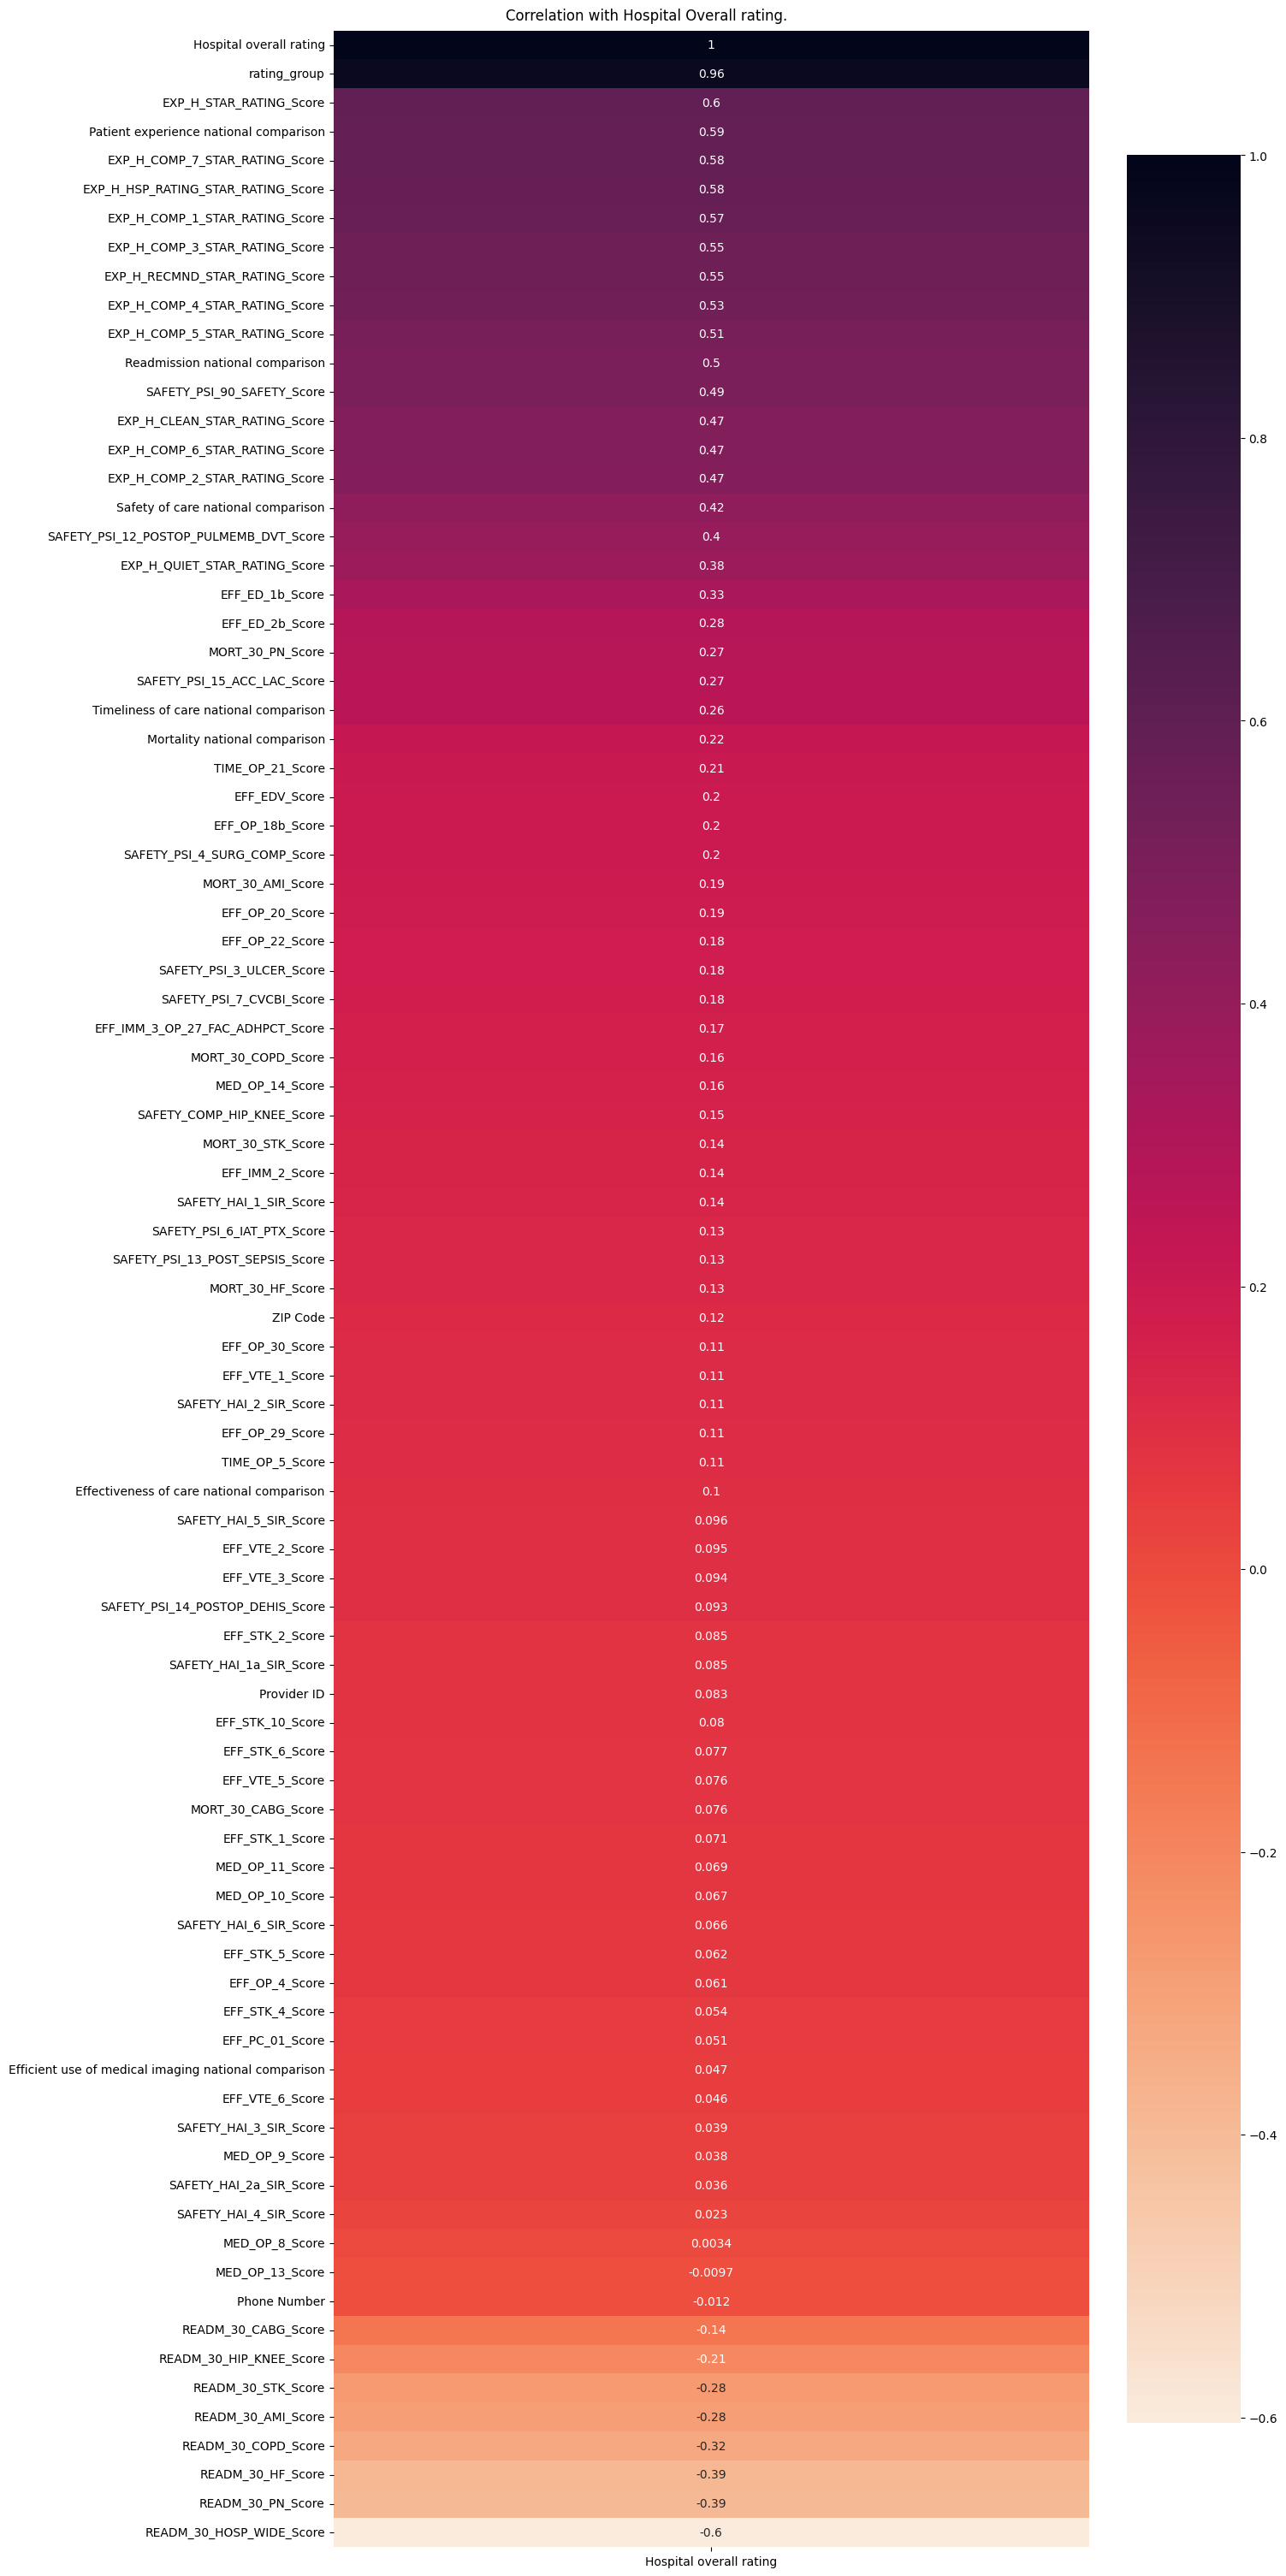

In [15]:
fig, ax = plt.subplots(figsize=(15, 30), constrained_layout=True)
sns.heatmap(df.corr(numeric_only=True)['Hospital overall rating'].sort_values(ascending=False).to_frame(), annot=True, ax=ax, cmap=sns.color_palette("rocket_r", as_cmap=True))
fig.suptitle("Correlation with Hospital Overall rating.")
plt.show()

## Exploring the Dataset.

### Univariate Analysis.

#### 1. Categorical Data

In [16]:
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

##### a. Countplot

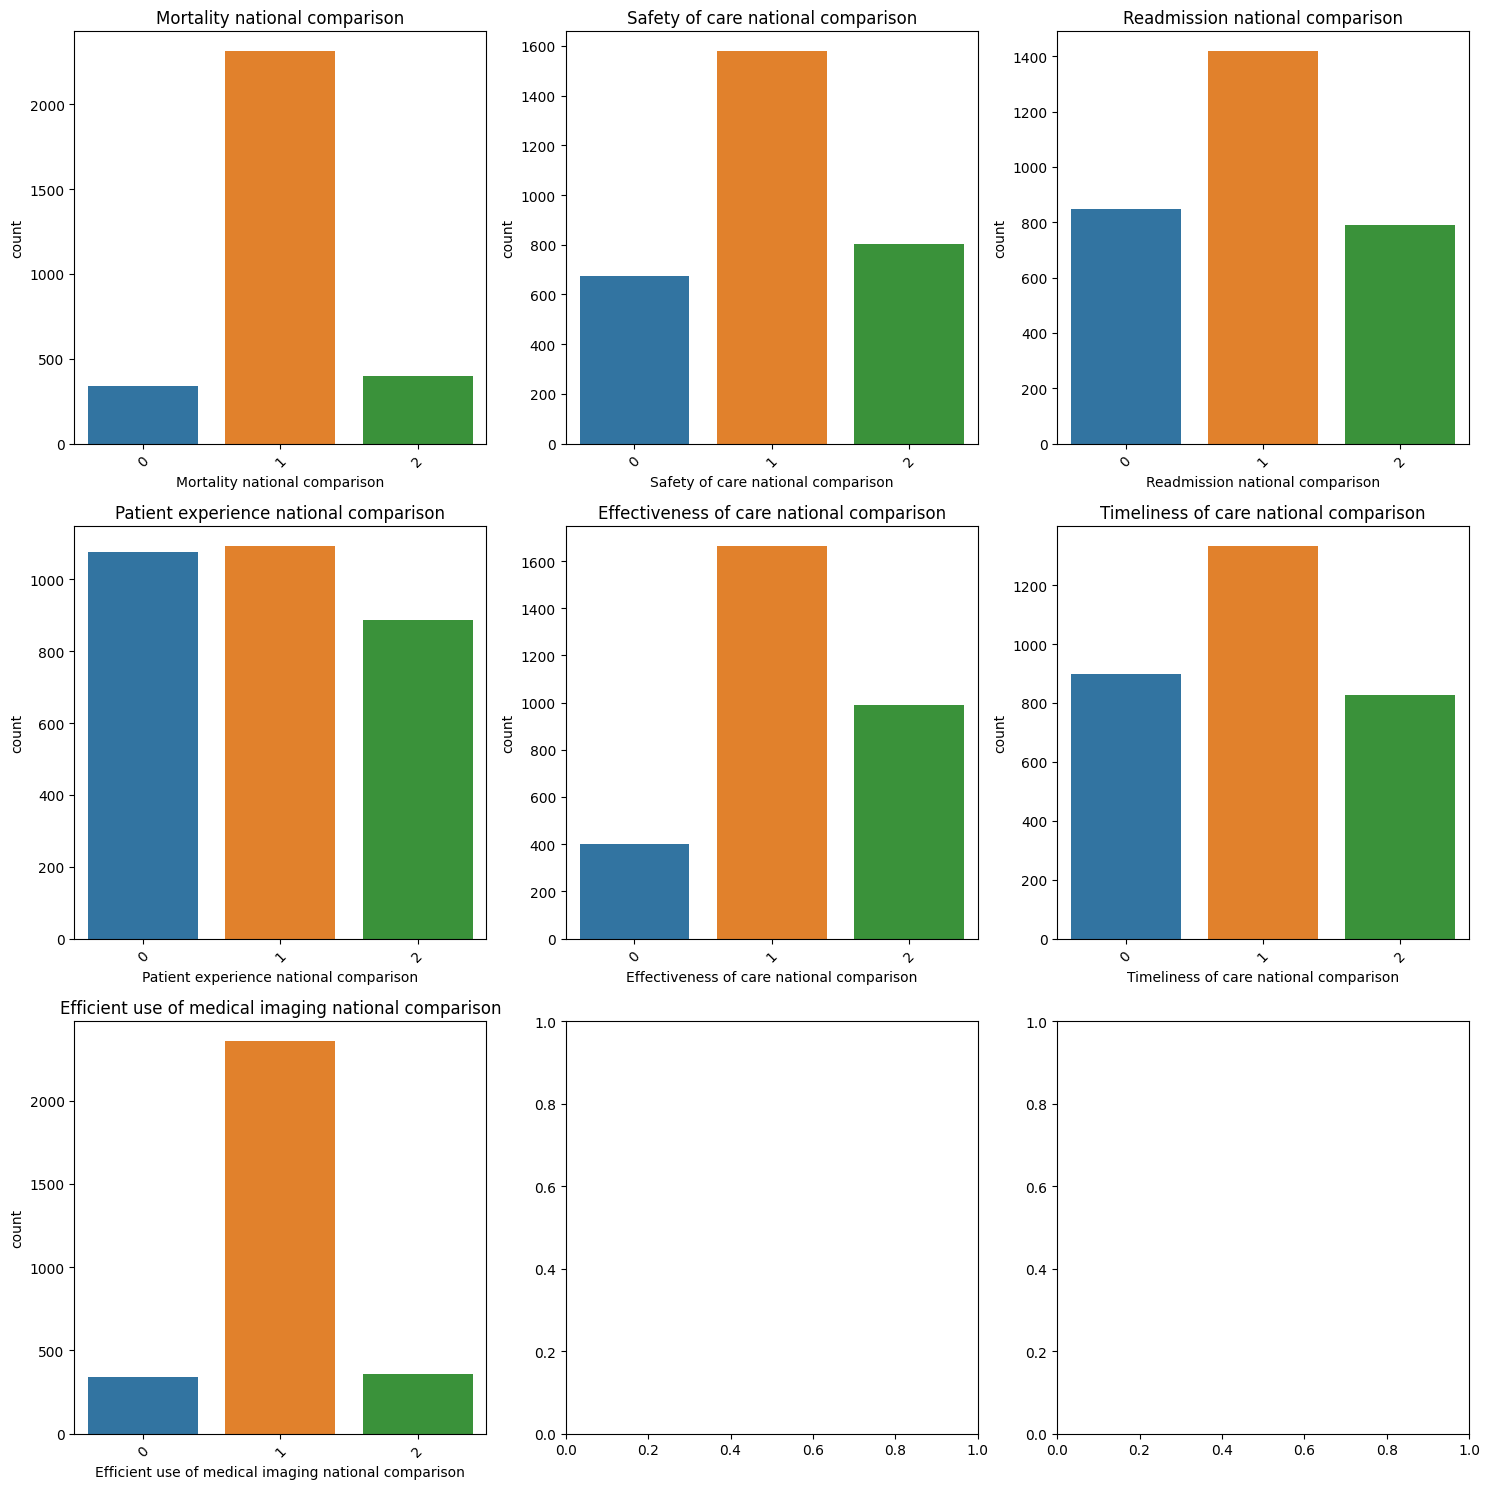

In [17]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a countplot
for i, feature in enumerate(features):
    # Create the countplot for the current feature
    sns.countplot(x=feature, data=df, ax=axes[i])
    
    # Set the title for the subplot
    axes[i].set_title(feature)
    
    # Rotate x-axis labels for better readability if needed
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()
    

##### B. pie chart

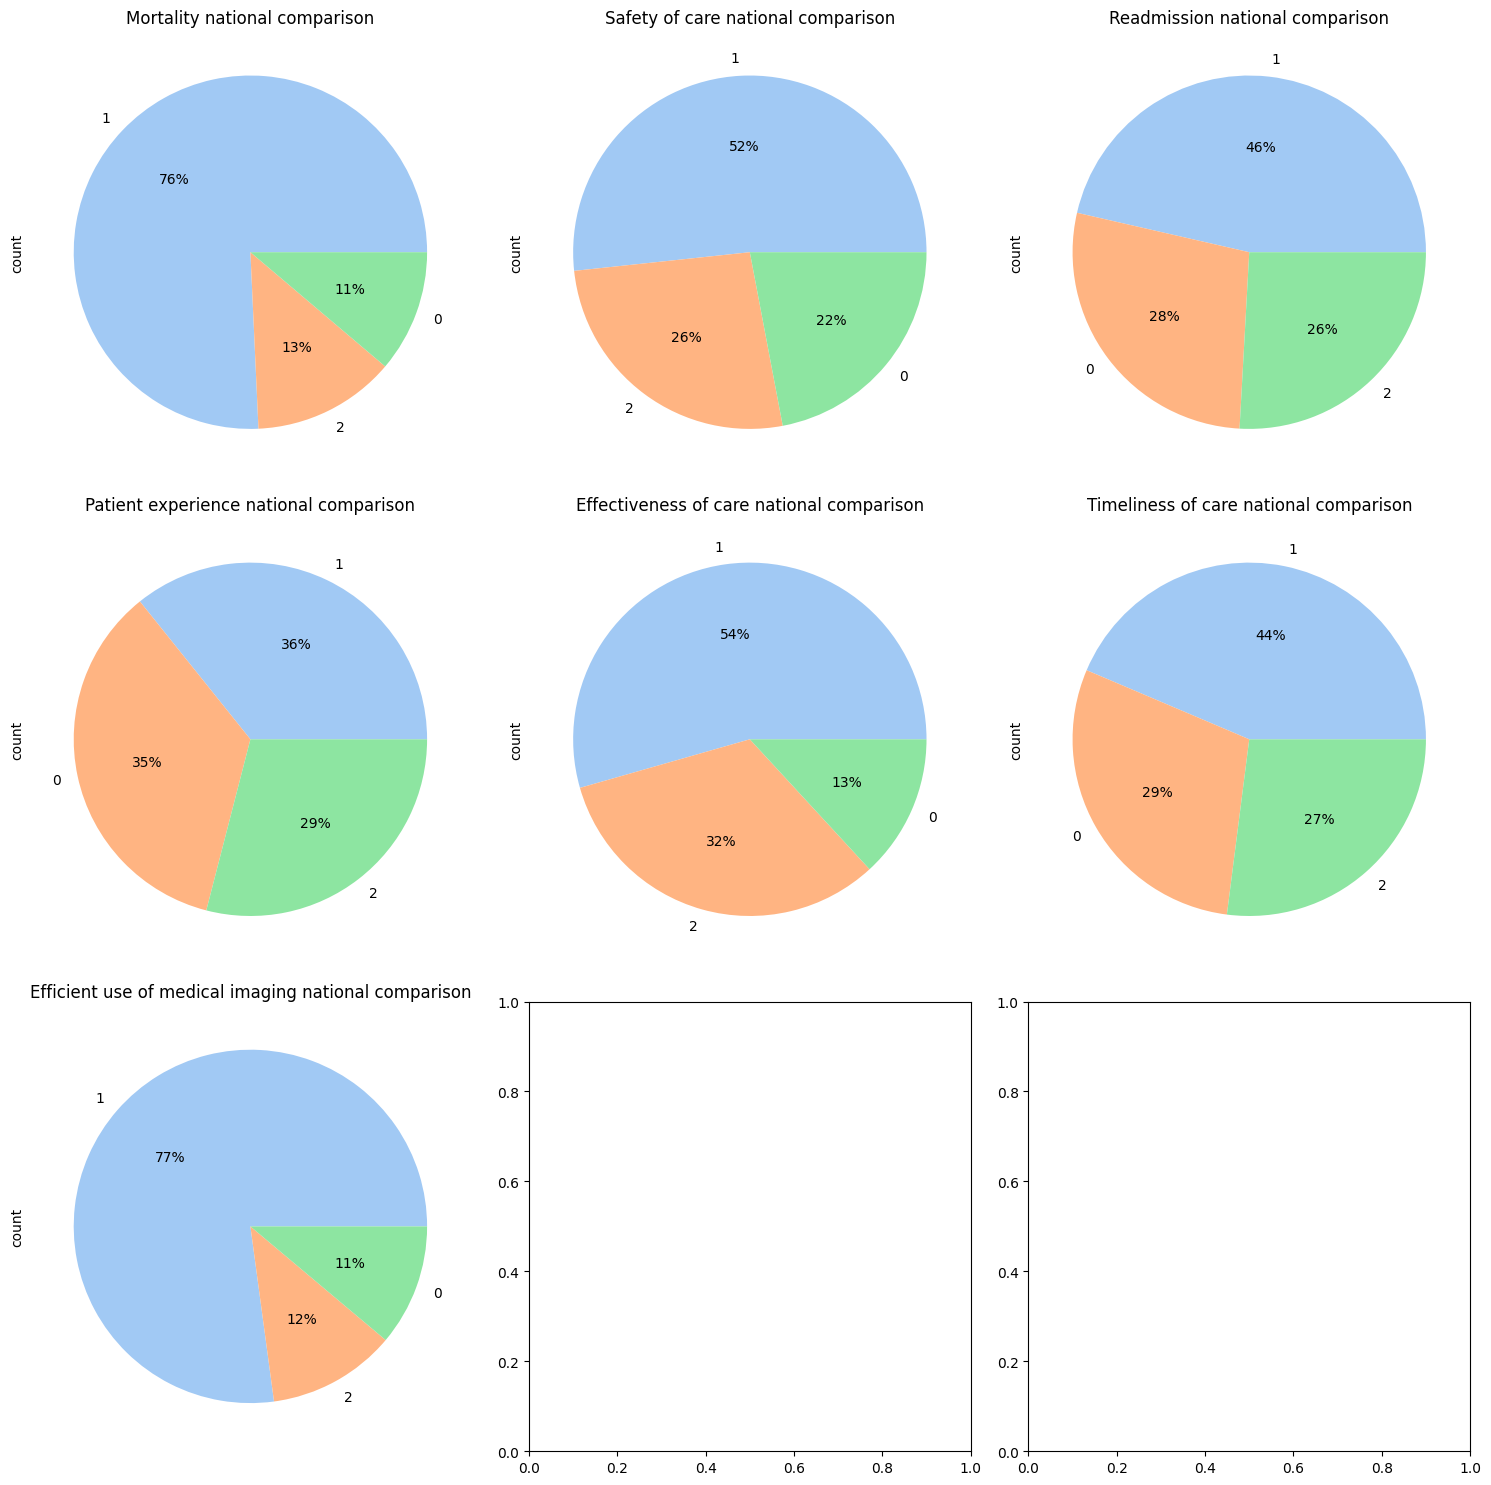

In [18]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a countplot
for i, feature in enumerate(features):
    ax = df[feature].value_counts().plot(kind='pie', colors=colors, autopct='%.0f%%', ax=axes[i])
    
    ax.set_title(feature)
    
    # Rotate x-axis labels for better readability if needed
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

#### 2. Numerical Data

### Grouping the Measures with their subset.

In [19]:
measures =  ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

In [20]:
read_mission_cols =  df.columns[df.columns.str.startswith('READM_')].to_list()

mortality_cols =  df.columns[df.columns.str.startswith('MORT_')].to_list()

timeliness_cols = df.columns[df.columns.str.startswith('TIME_')].to_list()

eff_care_cols = df.columns[df.columns.str.startswith('EFF_')].to_list()

experience_cols =  df.columns[df.columns.str.startswith('EXP_')].to_list()

safety_cols =  df.columns[df.columns.str.startswith('SAFETY_')].to_list()

med_img_cols = df.columns[df.columns.str.startswith('MED_')].to_list()

### a. Histogram

In [21]:
# Define the columns for each measure
measure_columns = {
    'Mortality': mortality_cols,
    'Readmission': read_mission_cols,
    'Timeliness': timeliness_cols,
    'Effectiveness of Care': eff_care_cols,
    'Patient Experience': experience_cols,
    'Safety of Care': safety_cols,
    'Medical Imaging': med_img_cols
}

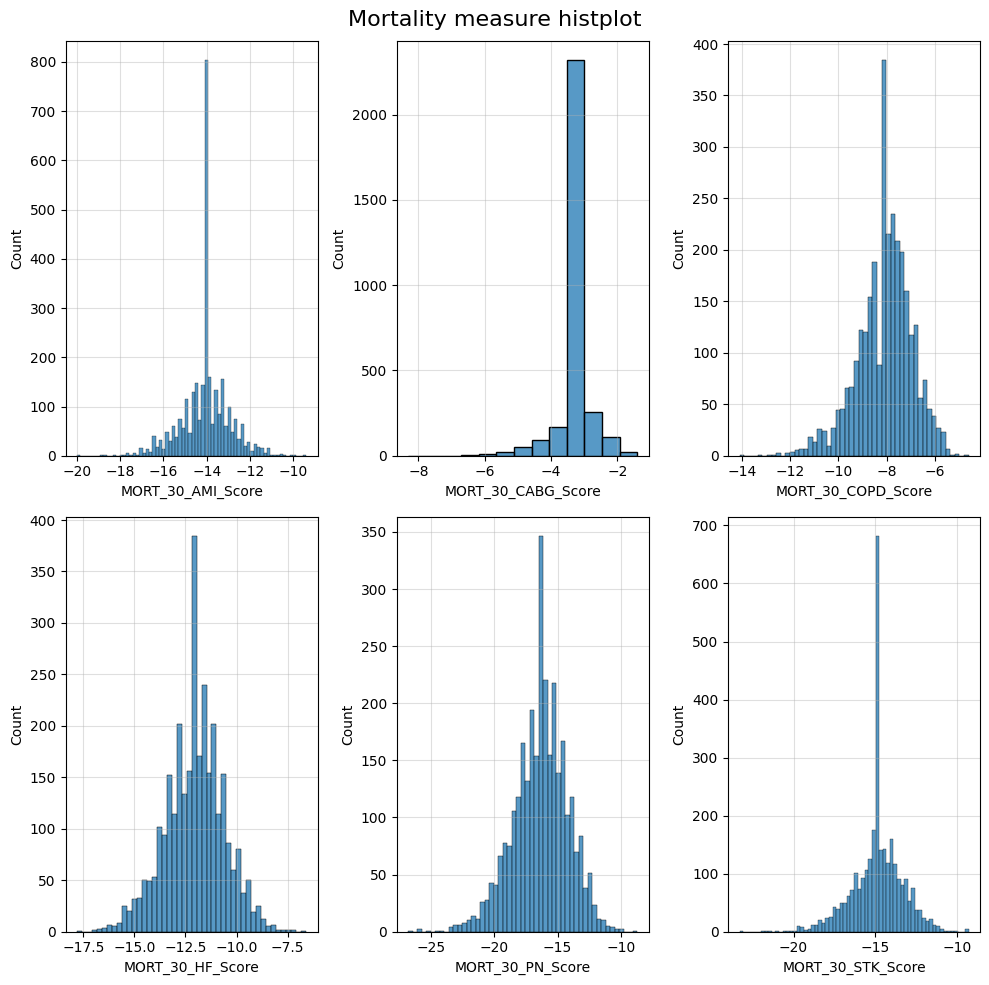

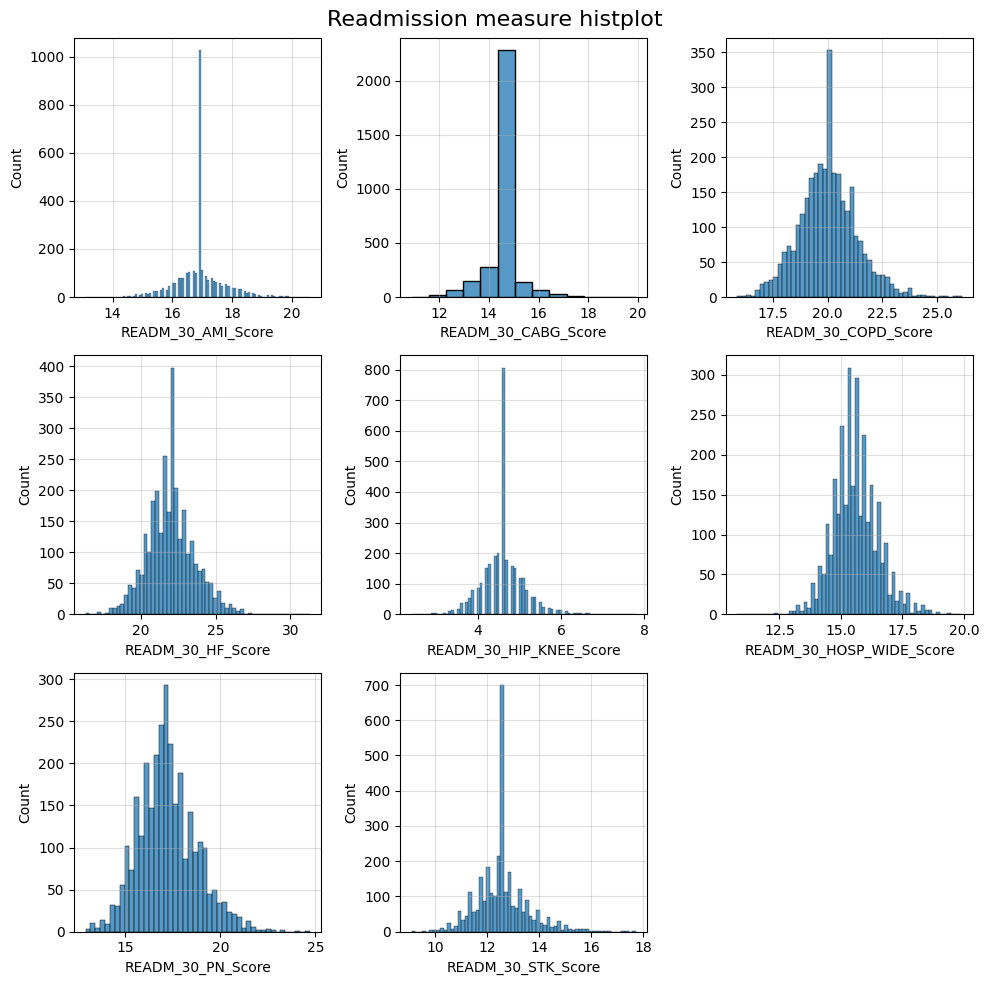

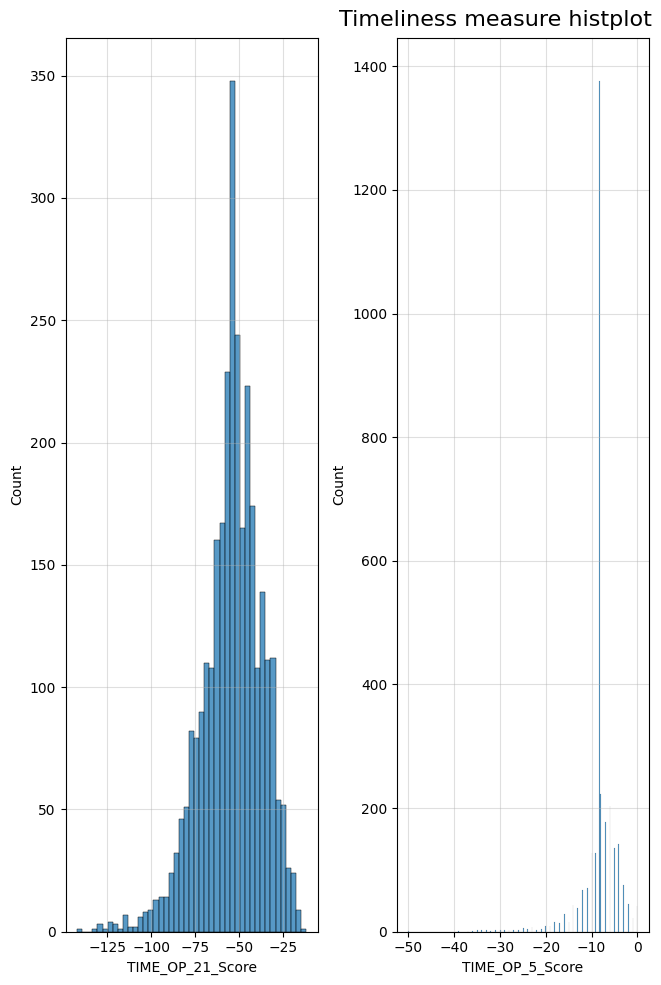

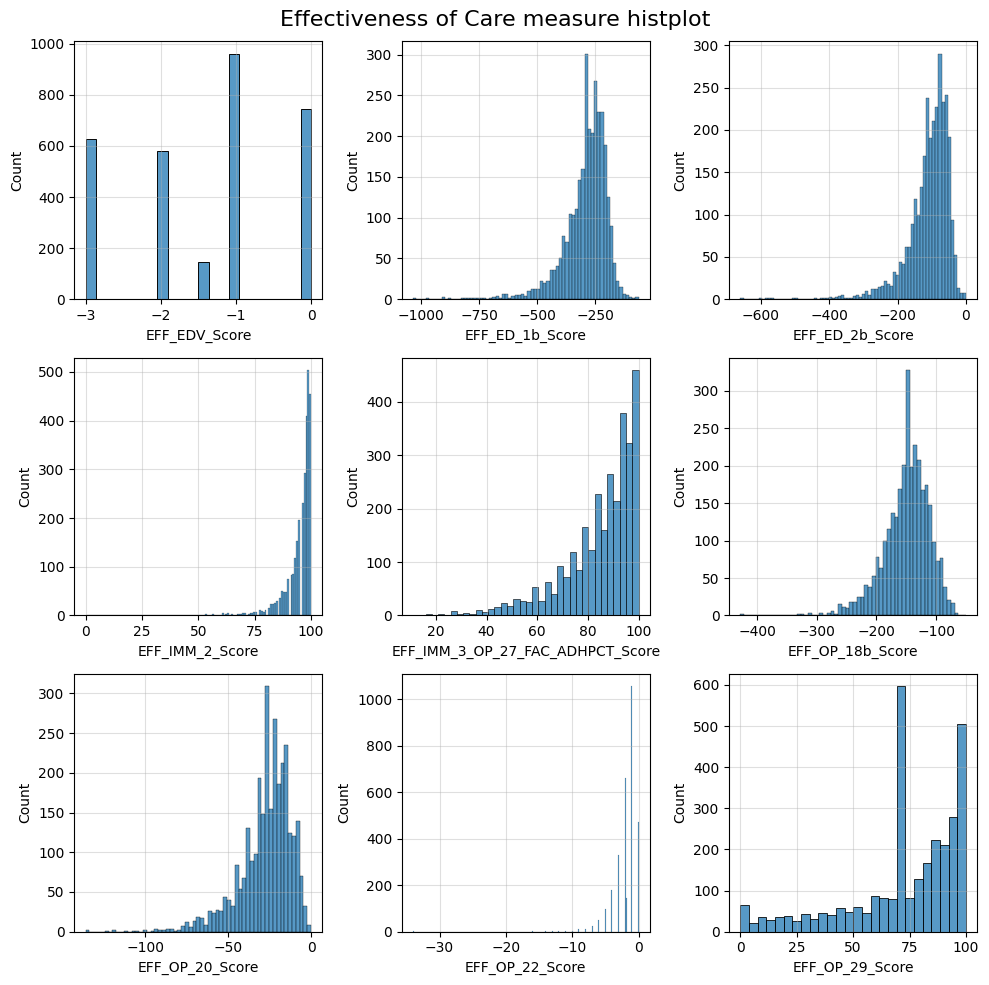

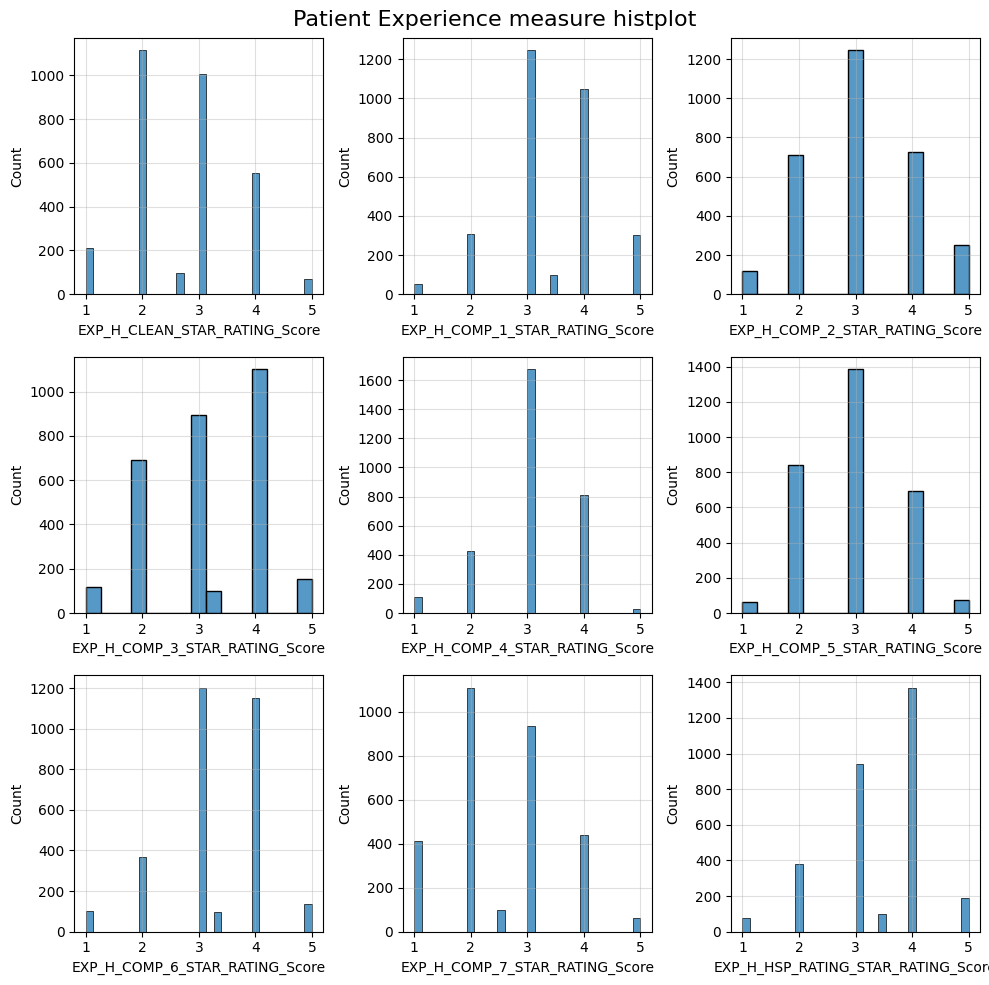

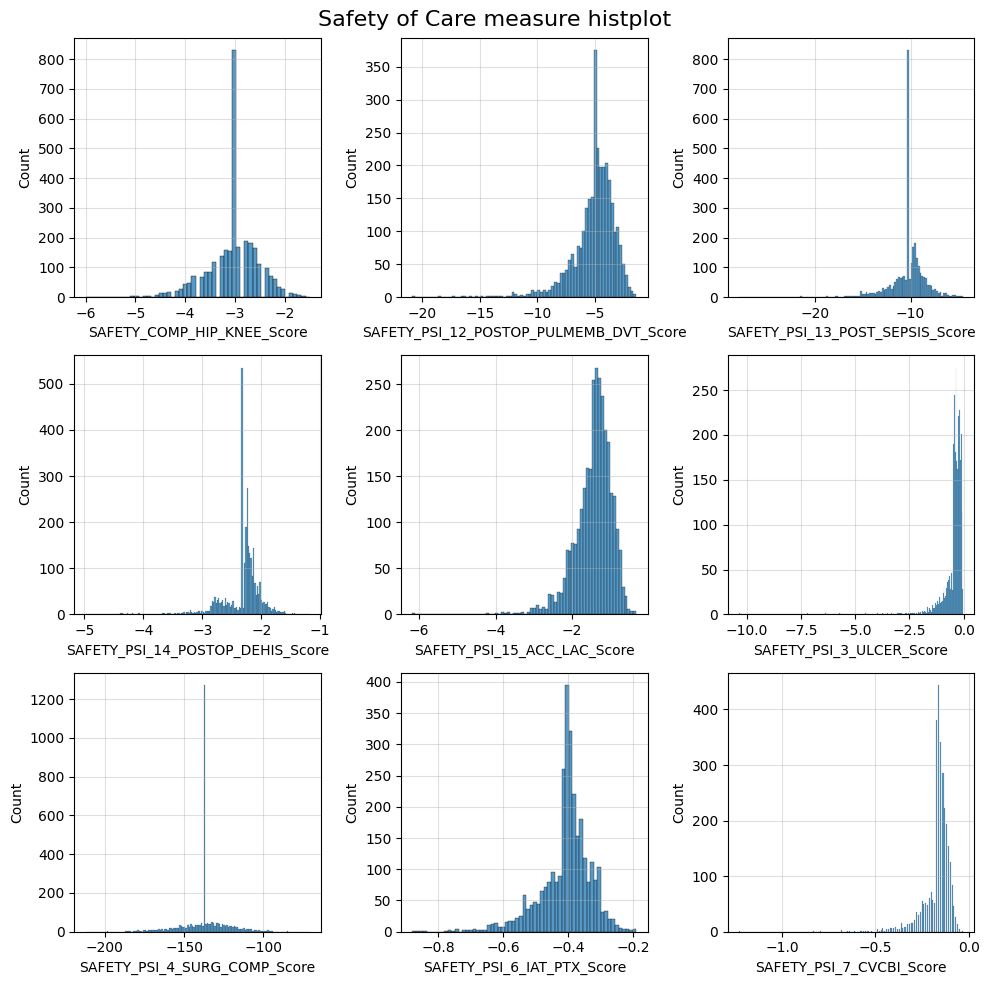

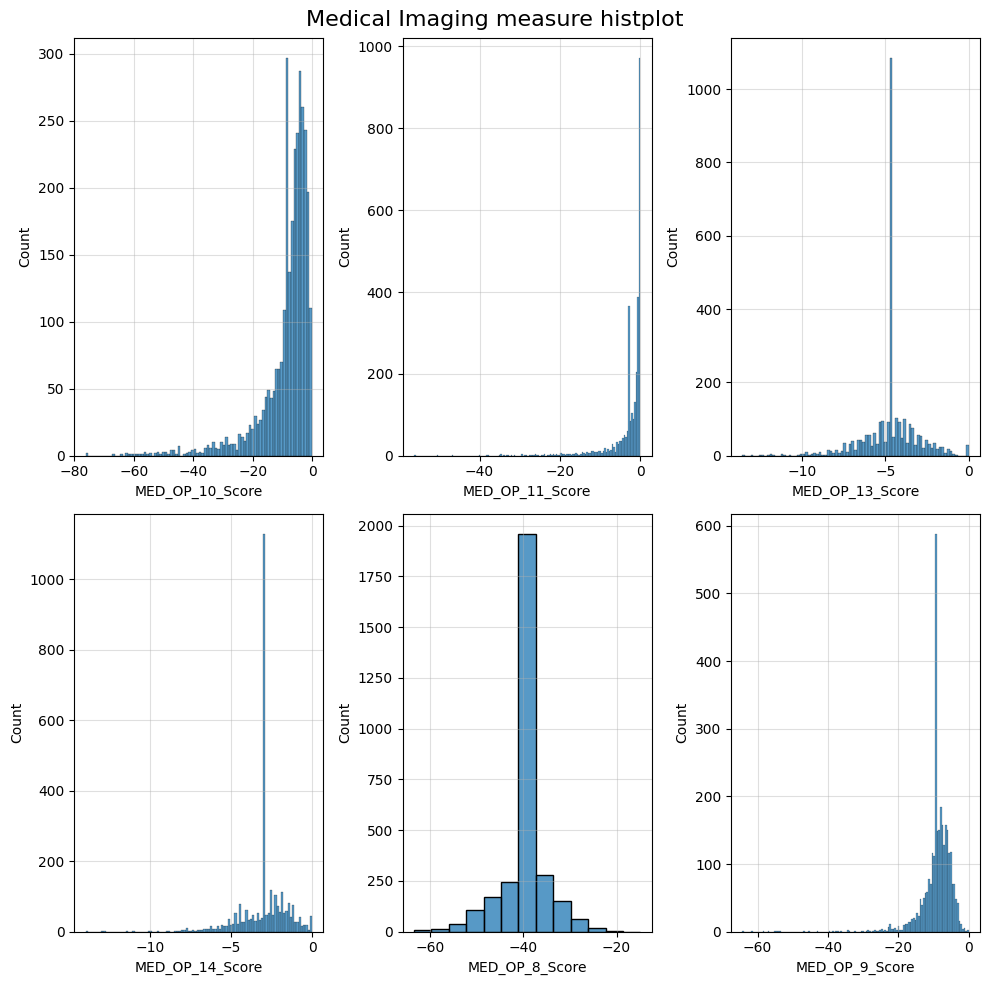

In [22]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

# Iterate over each measure and its columns
for measure, columns in measure_columns.items():
    num_cols = len(columns)
    num_plots = min(num_cols, rows * cols)
    num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

    # Create a new figure for the measure
    fig = plt.figure(figsize=(10, 10))

    # Iterate over each column of the measure
    for i, col in enumerate(columns[:num_plots]):
        # Create subplot
        plt.subplot(num_rows, cols, i + 1)
        
        # Plot histogram
        ax = sns.histplot(df[col])
        ax.grid(alpha=0.4)
        
        # Set title for each subplot
        fig.suptitle(col)
        
    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.suptitle(f'{measure} measure histplot', fontsize=16)
    plt.show()

### b. KDE plot

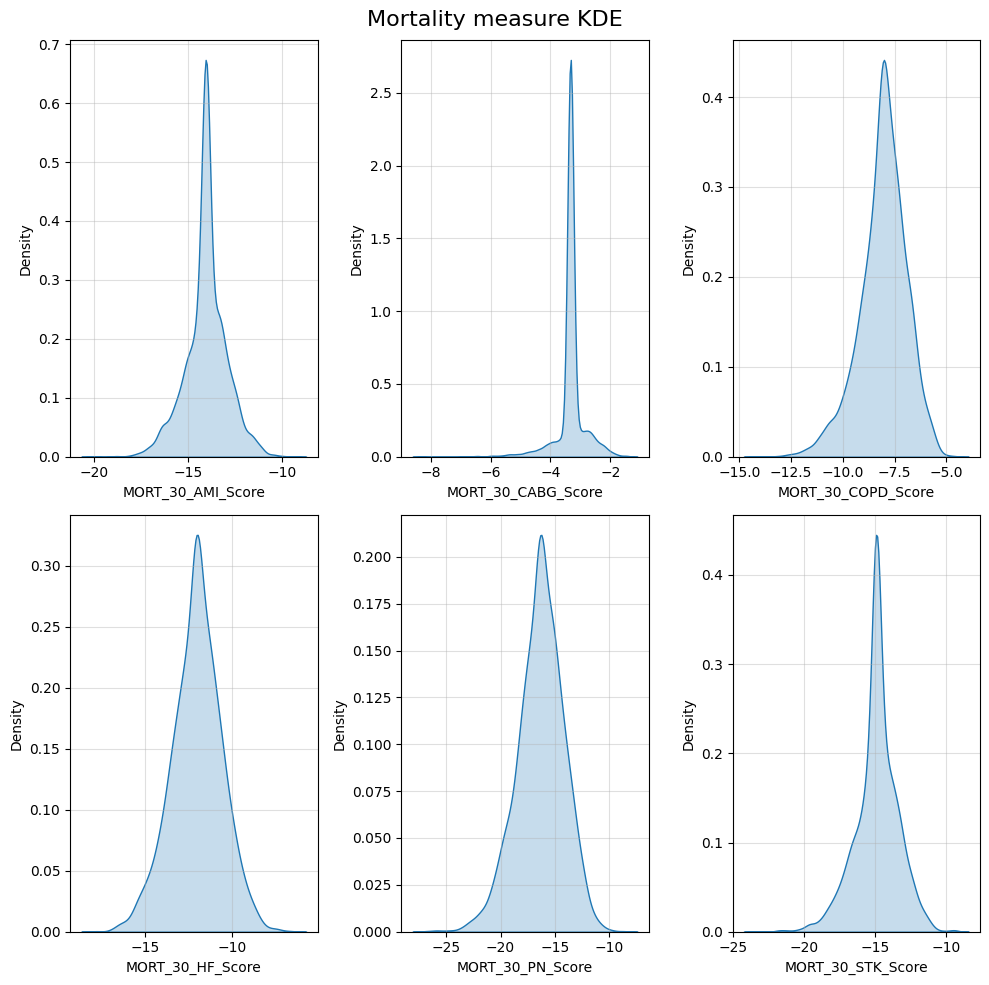

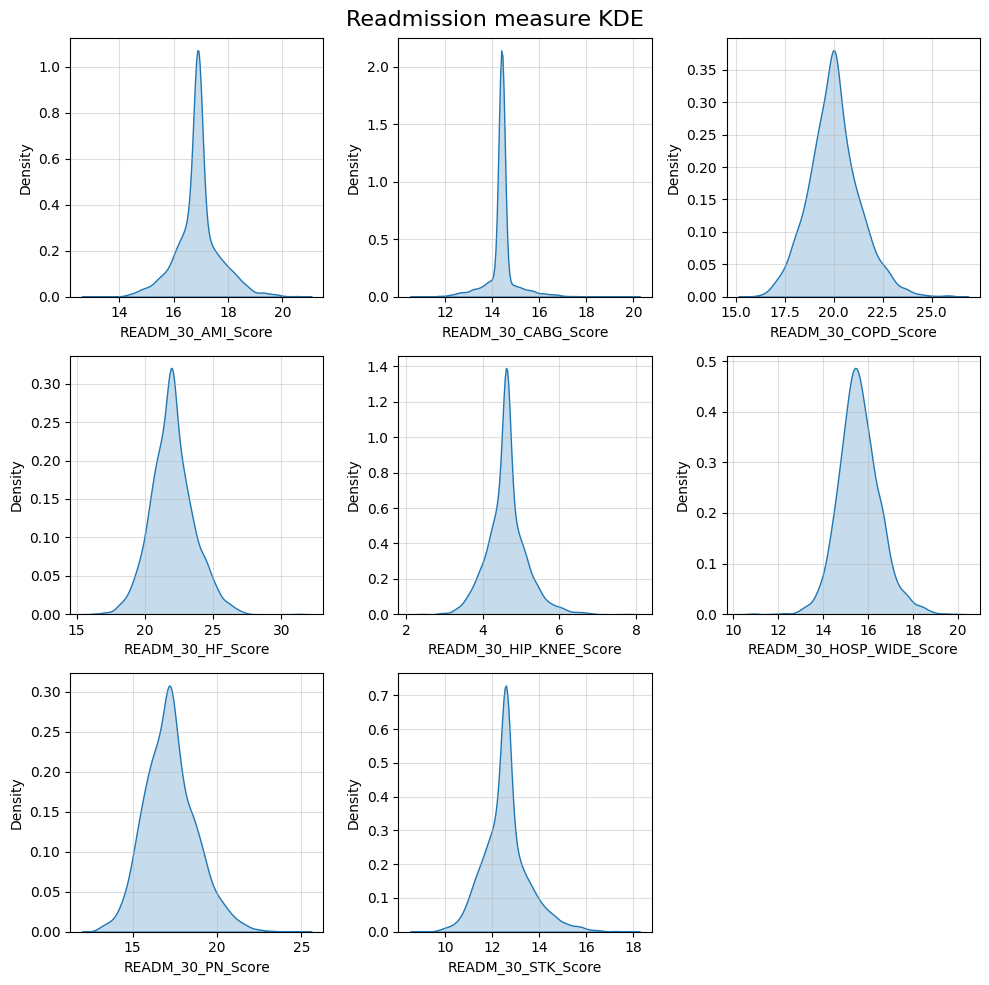

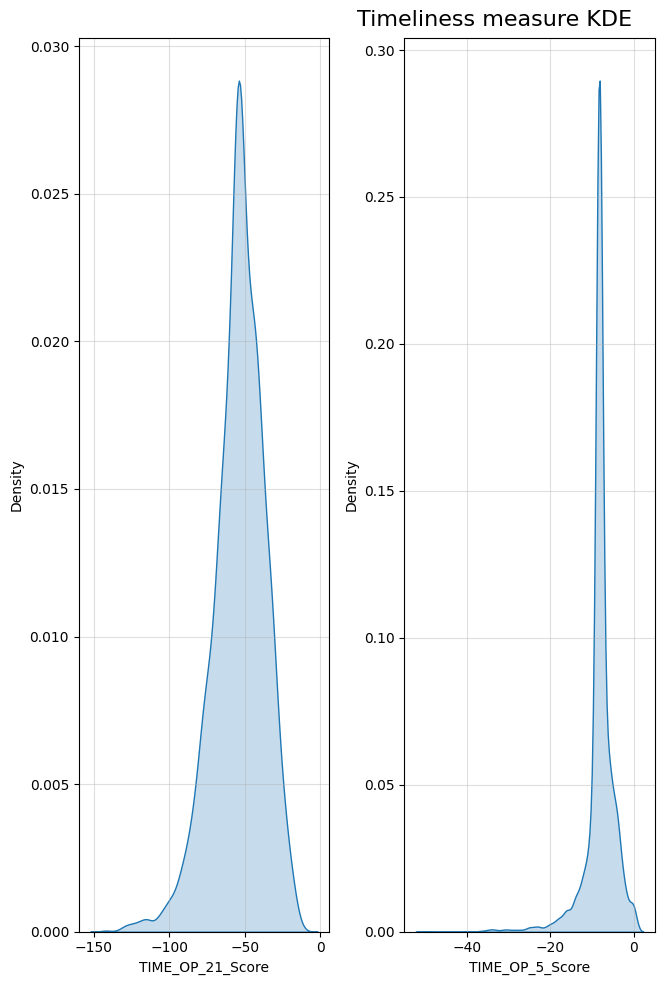

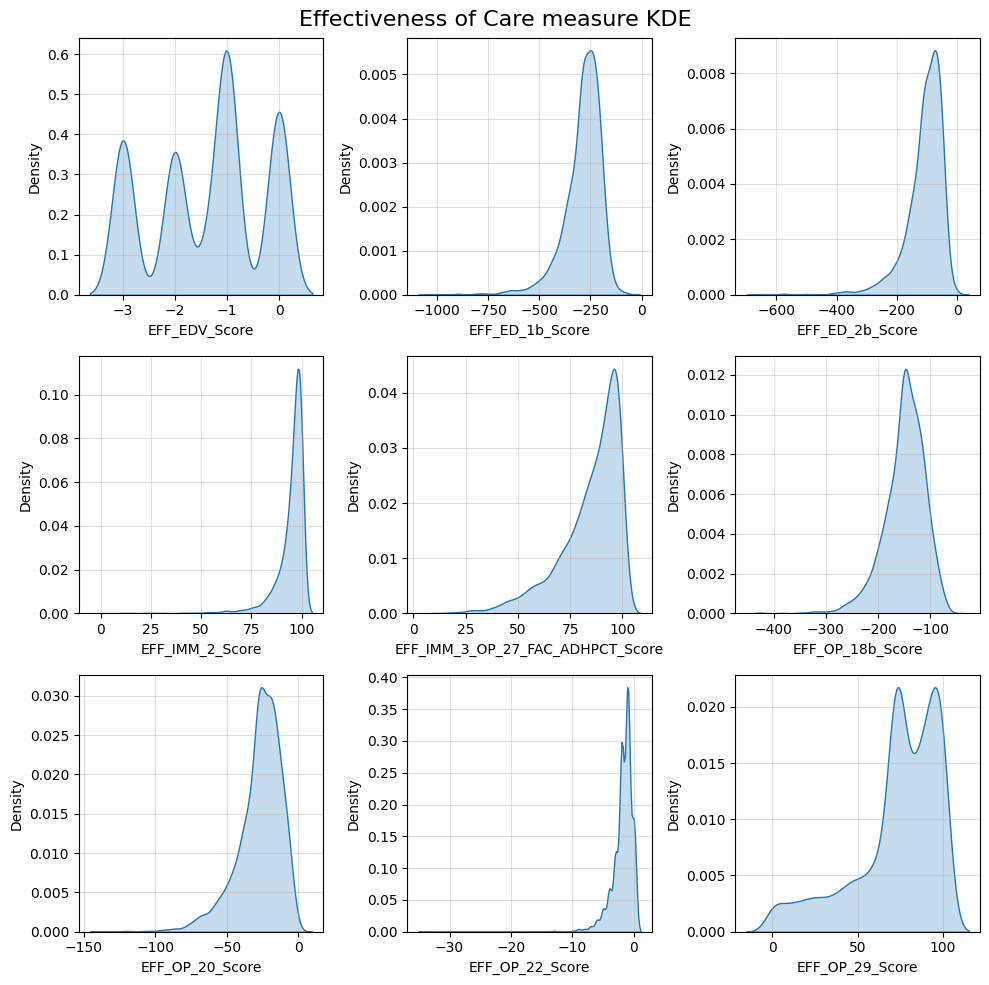

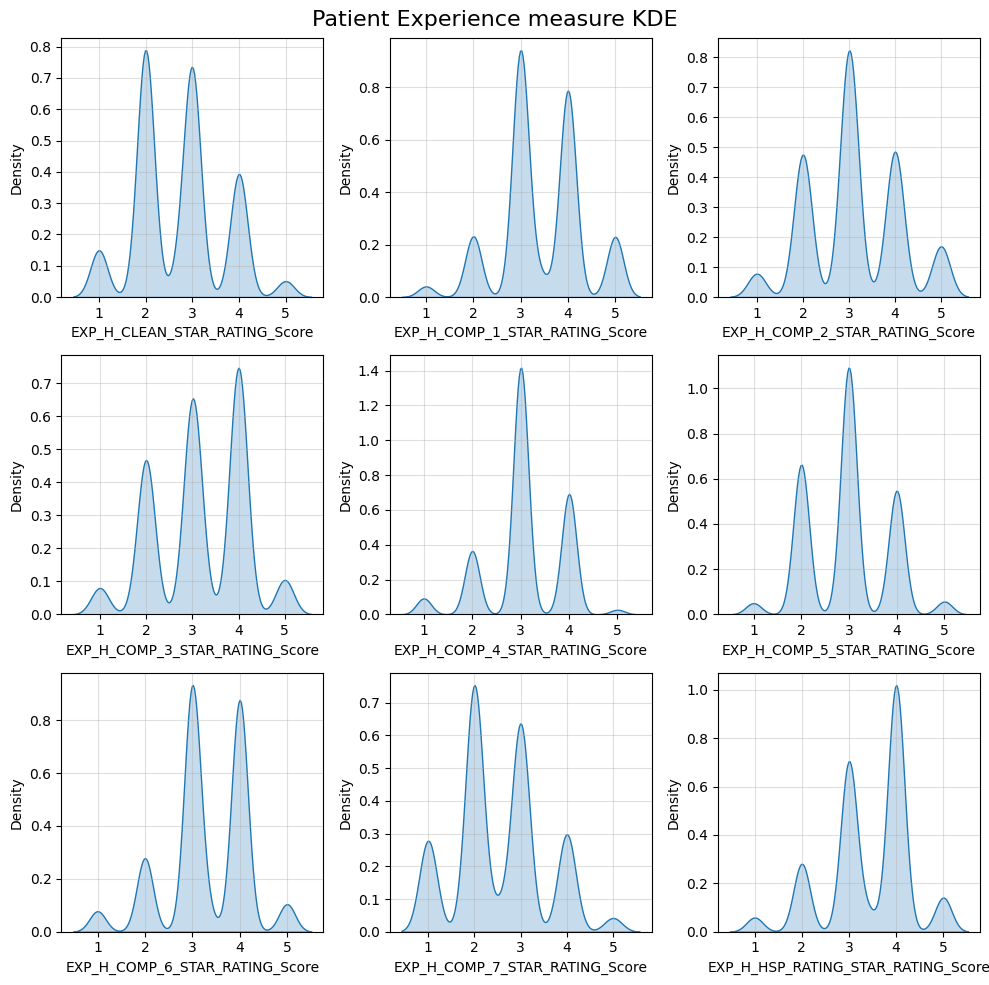

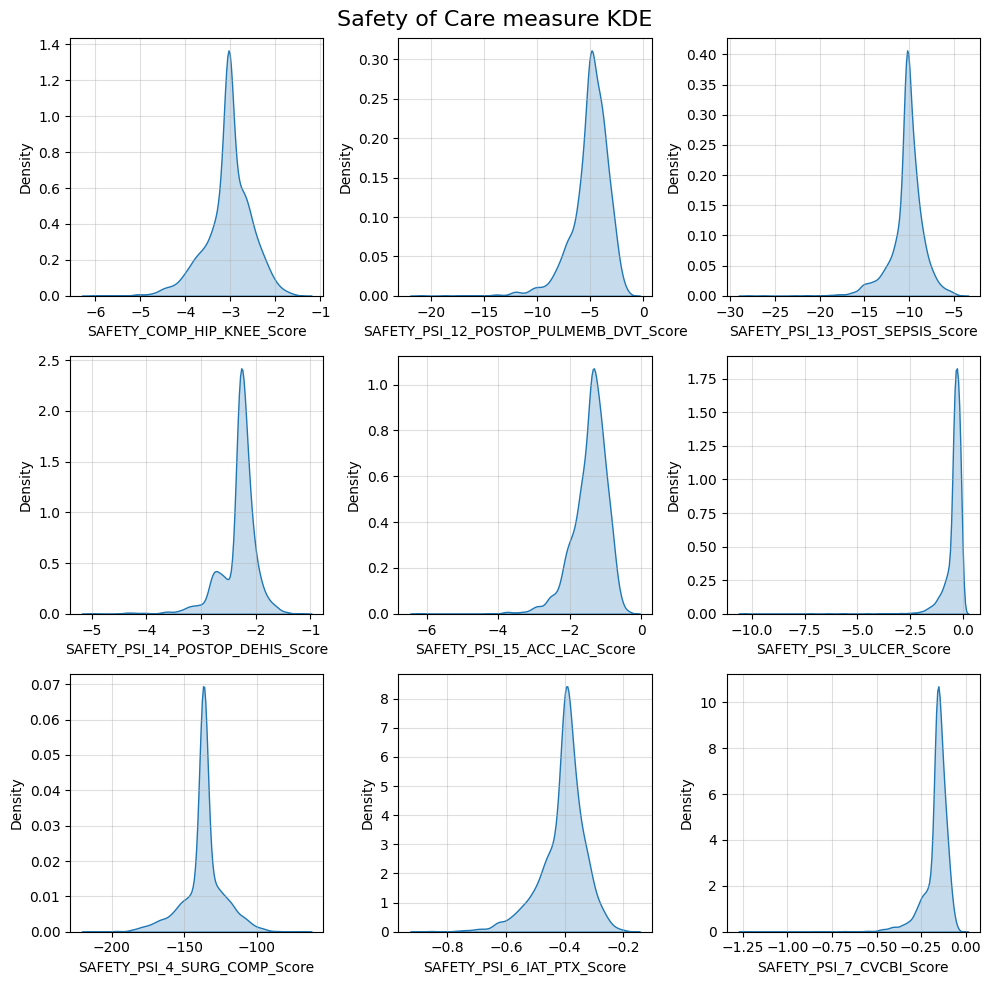

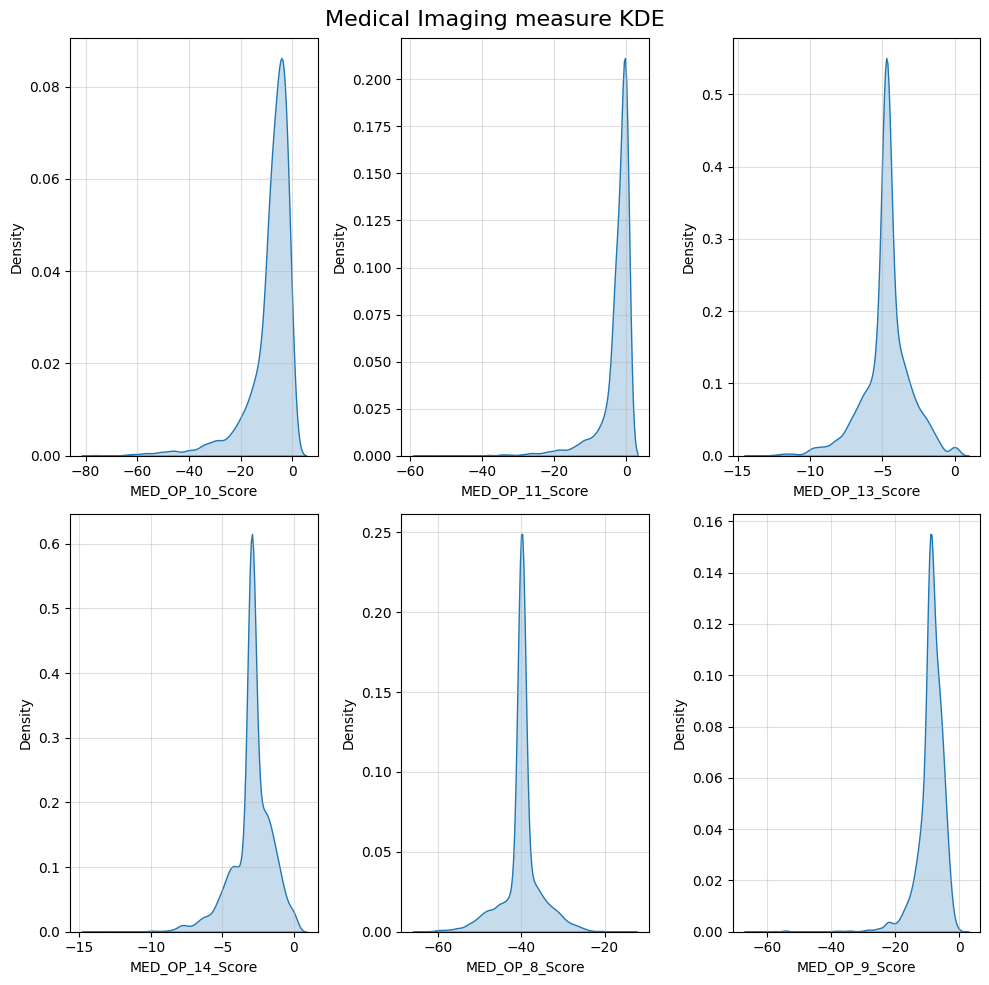

In [23]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

# Iterate over each measure and its columns
for measure, columns in measure_columns.items():
    num_cols = len(columns)
    num_plots = min(num_cols, rows * cols)
    num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

    # Create a new figure for the measure
    fig = plt.figure(figsize=(10, 10))

    # Iterate over each column of the measure
    for i, col in enumerate(columns[:num_plots]):
        # Create subplot
        plt.subplot(num_rows, cols, i + 1)
        
        # Plot histogram
        ax = sns.kdeplot(df[col], fill=True)
        ax.grid(alpha=0.4)
        
        # Set title for each subplot
        fig.suptitle(col)
        
    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.suptitle(f'{measure} measure KDE', fontsize=16)
    plt.show()

### c. Boxplot

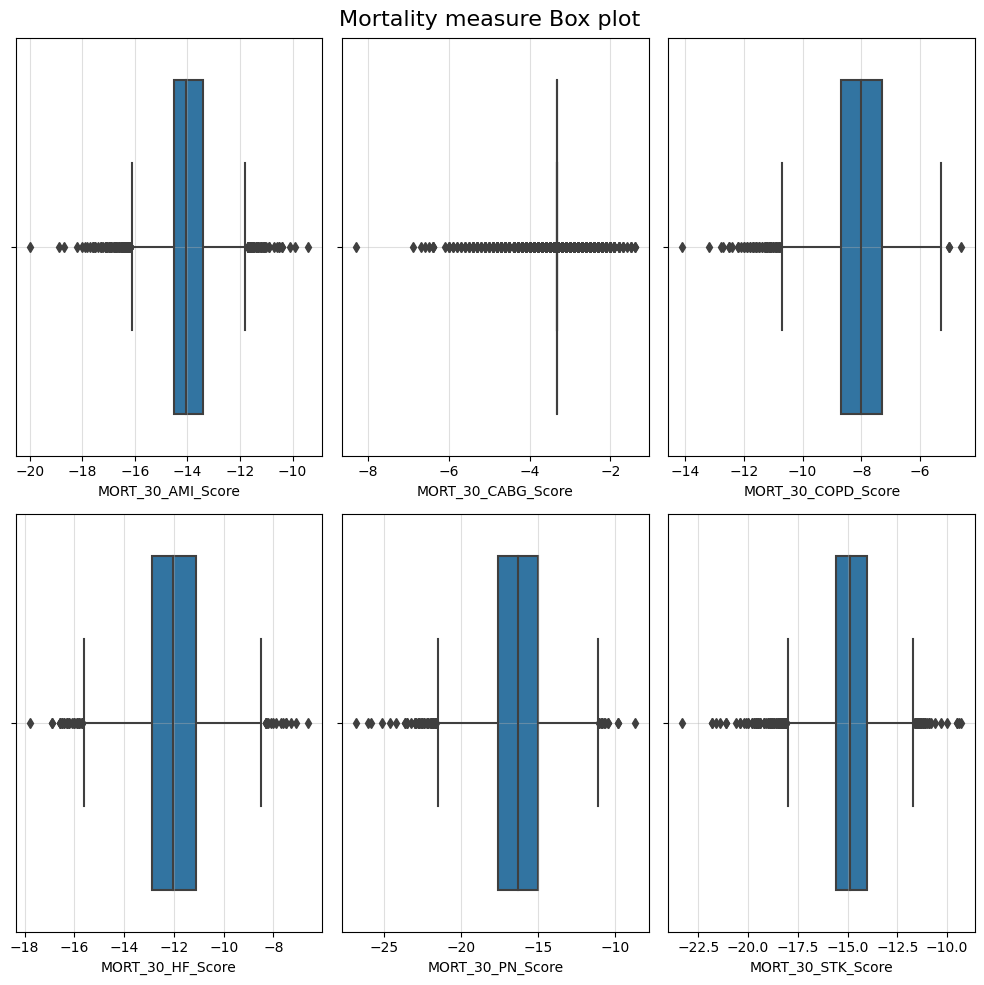

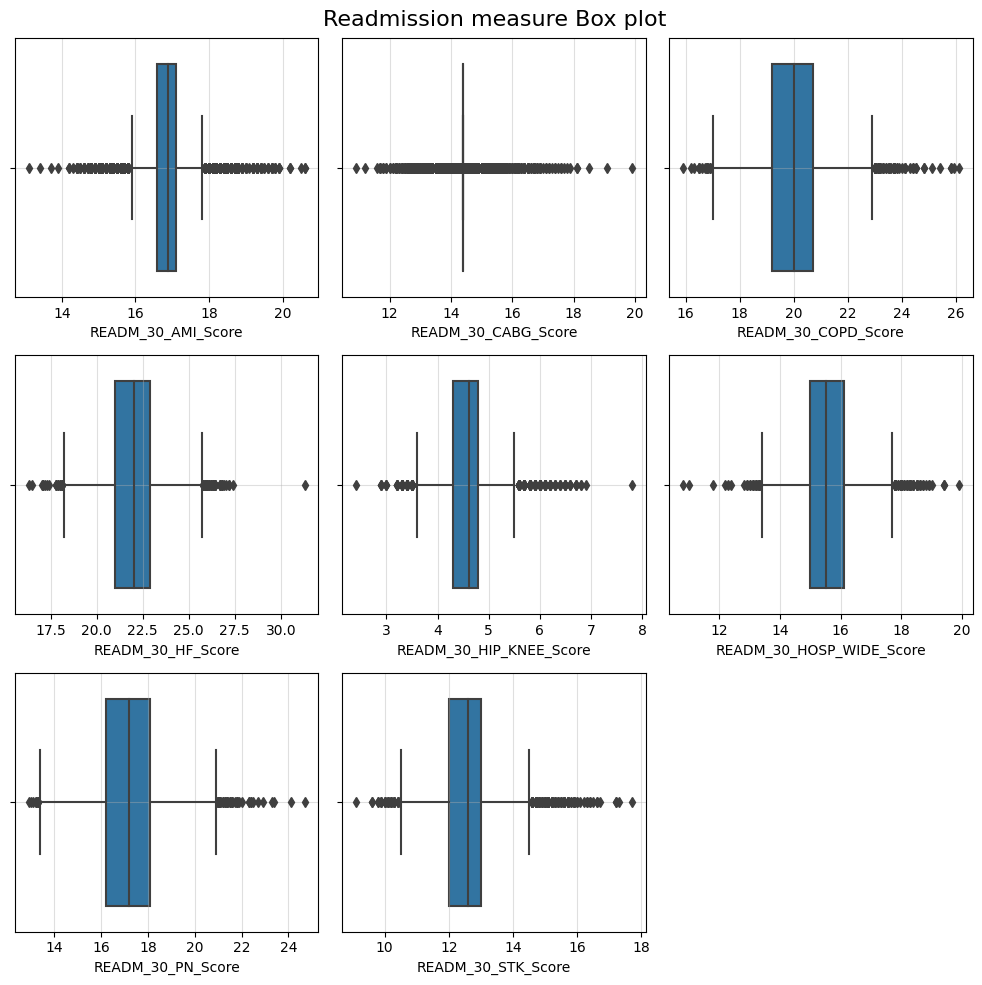

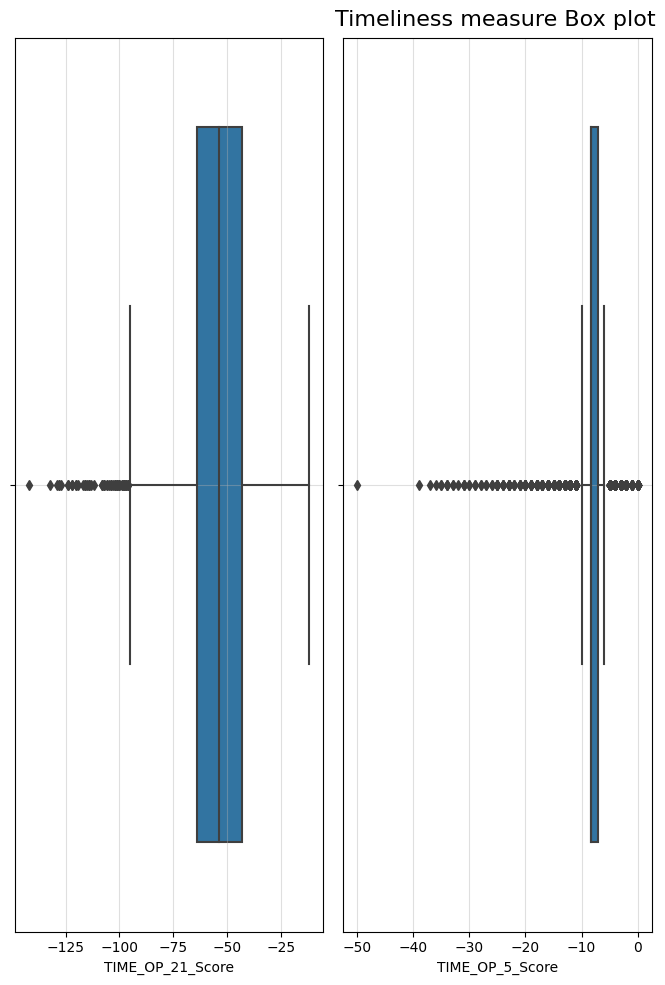

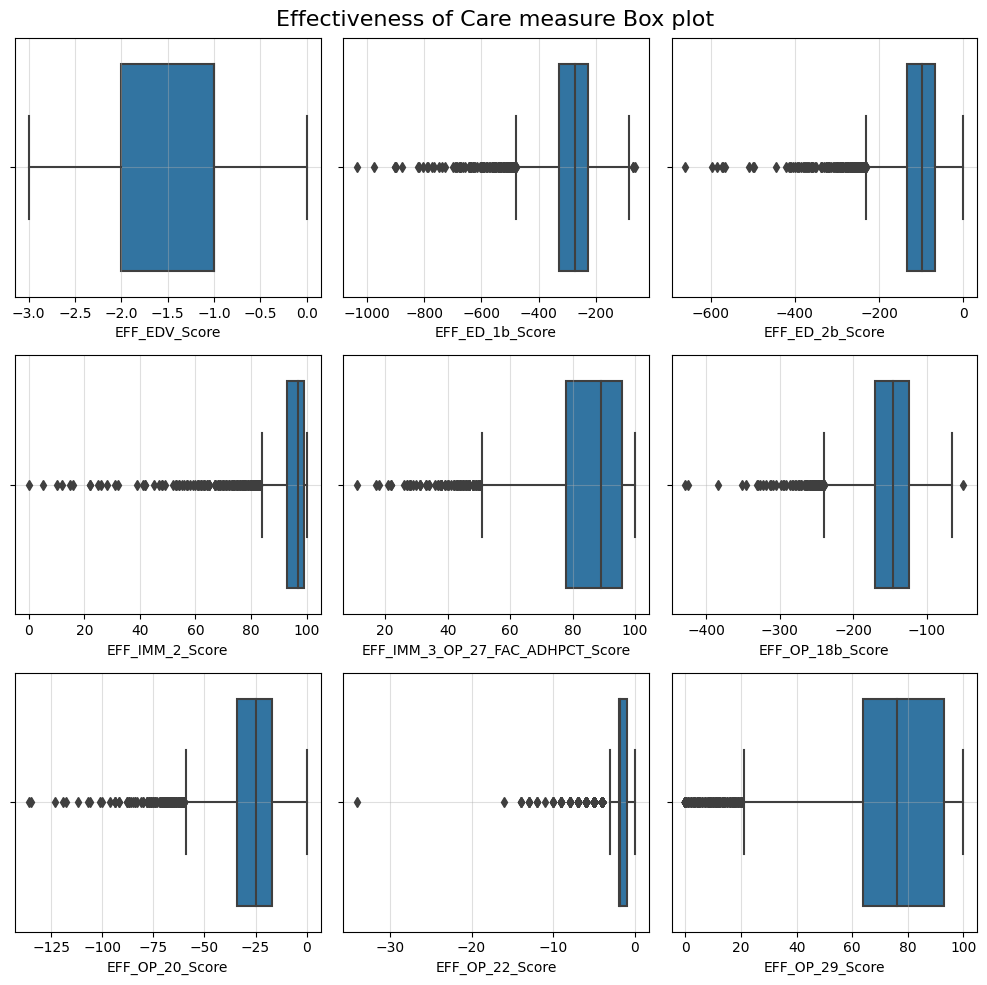

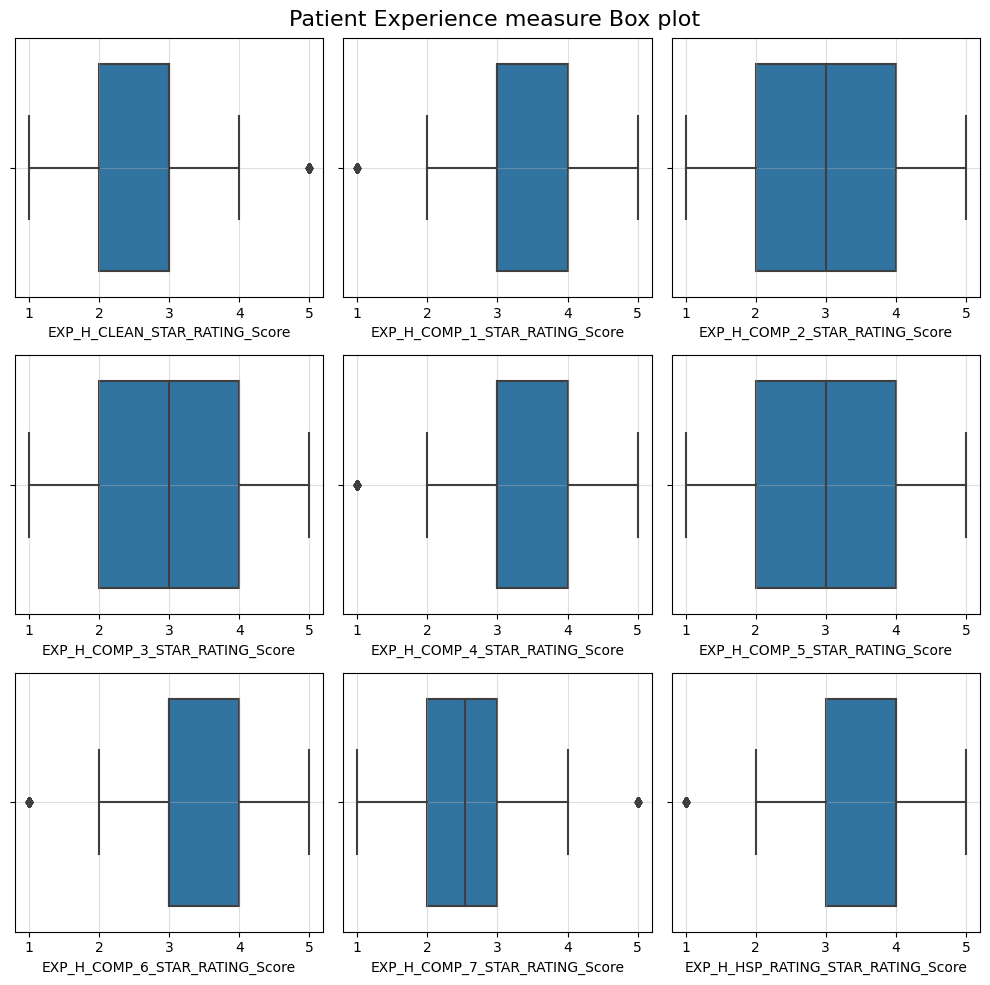

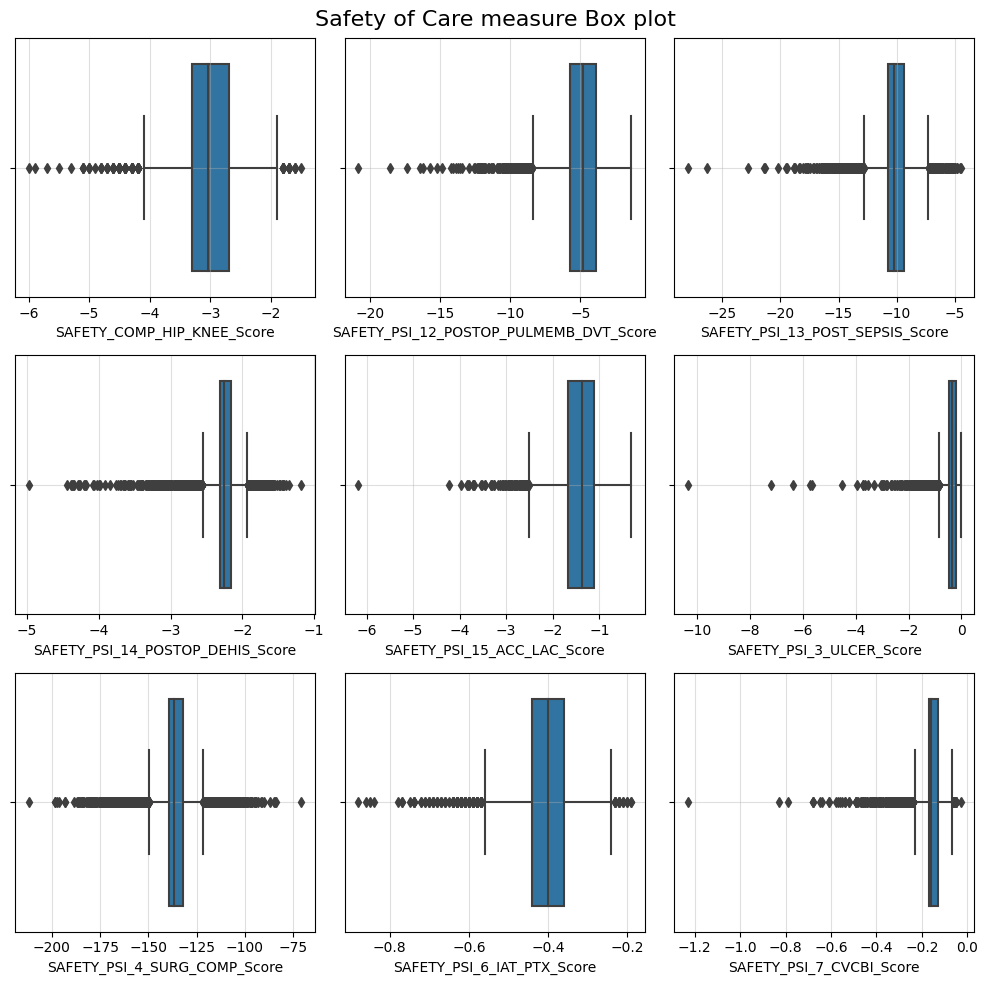

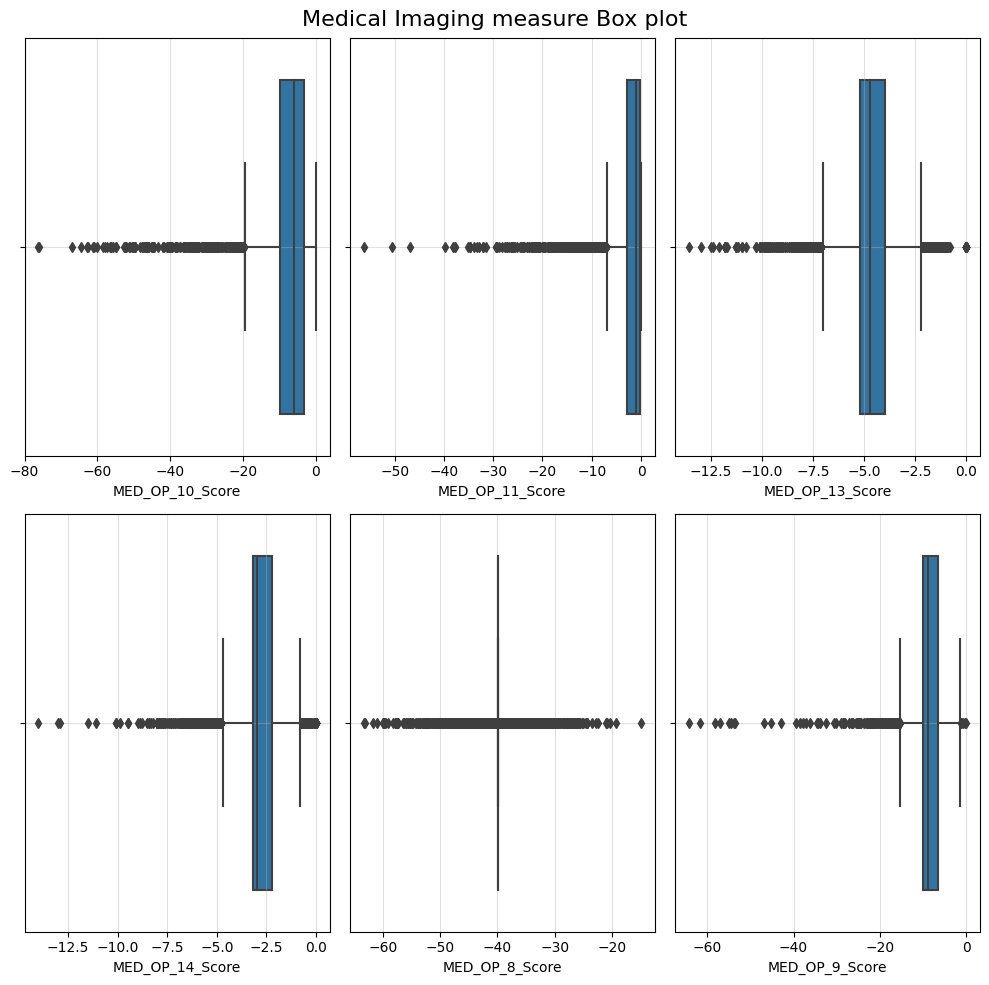

In [24]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

# Iterate over each measure and its columns
for measure, columns in measure_columns.items():
    num_cols = len(columns)
    num_plots = min(num_cols, rows * cols)
    num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

    # Create a new figure for the measure
    fig = plt.figure(figsize=(10, 10))

    # Iterate over each column of the measure
    for i, col in enumerate(columns[:num_plots]):
        # Create subplot
        plt.subplot(num_rows, cols, i + 1)
        
        # Plot histogram
        ax = sns.boxplot(x=df[col])
        ax.grid(alpha=0.4)
        
        # Set title for each subplot
        fig.suptitle(col)
        
    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.suptitle(f'{measure} measure Box plot', fontsize=16)
    plt.show()

### Bivariate / Multivariate Analysis.

### 1. Scatterplot

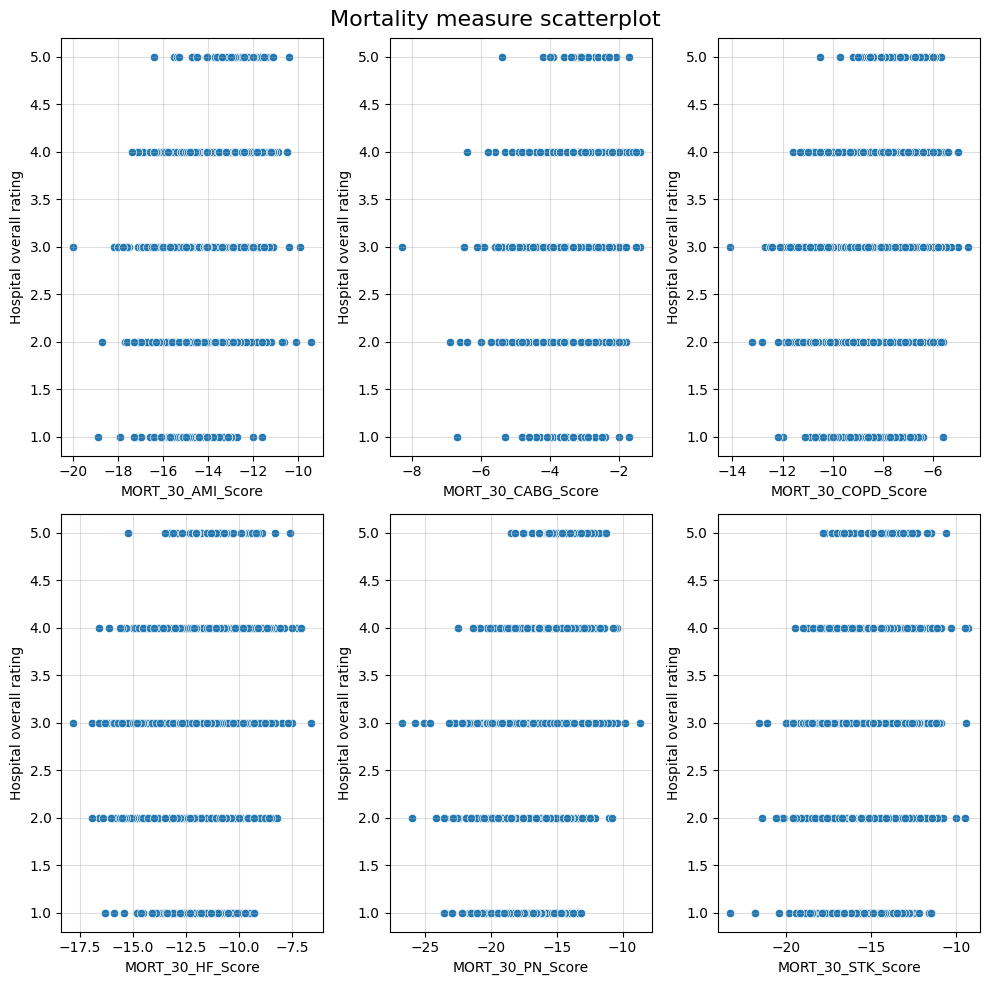

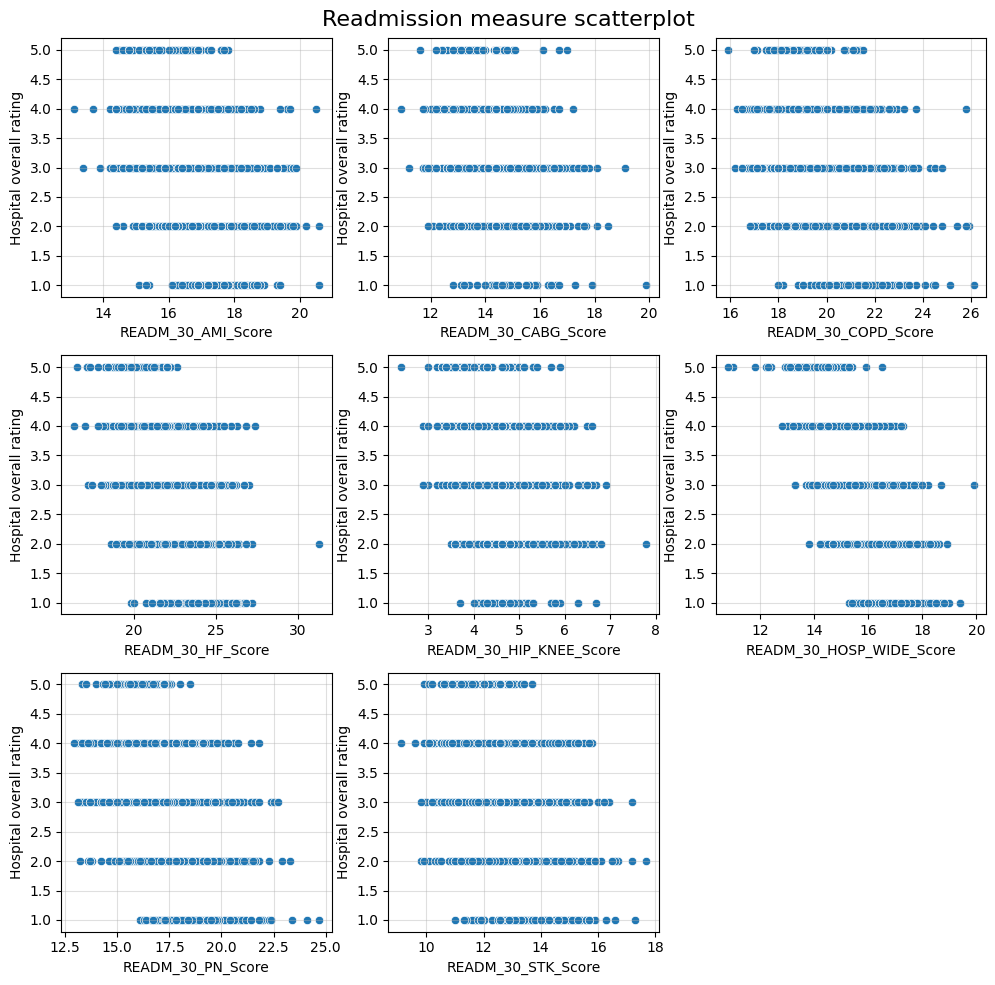

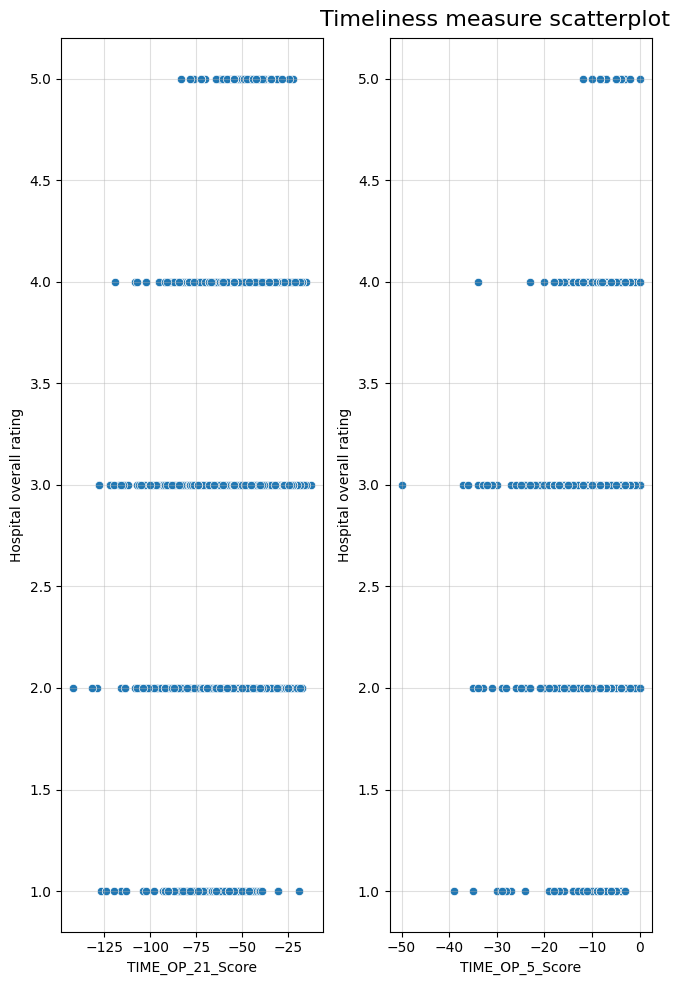

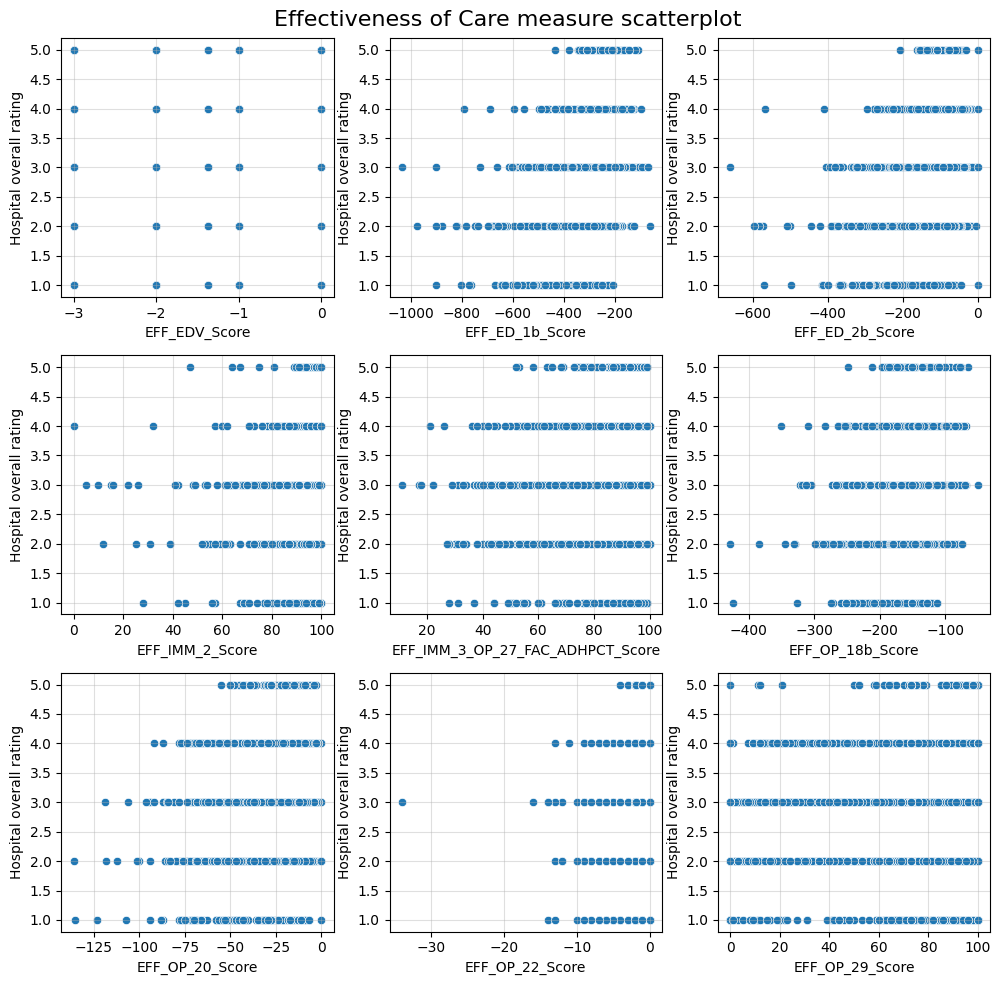

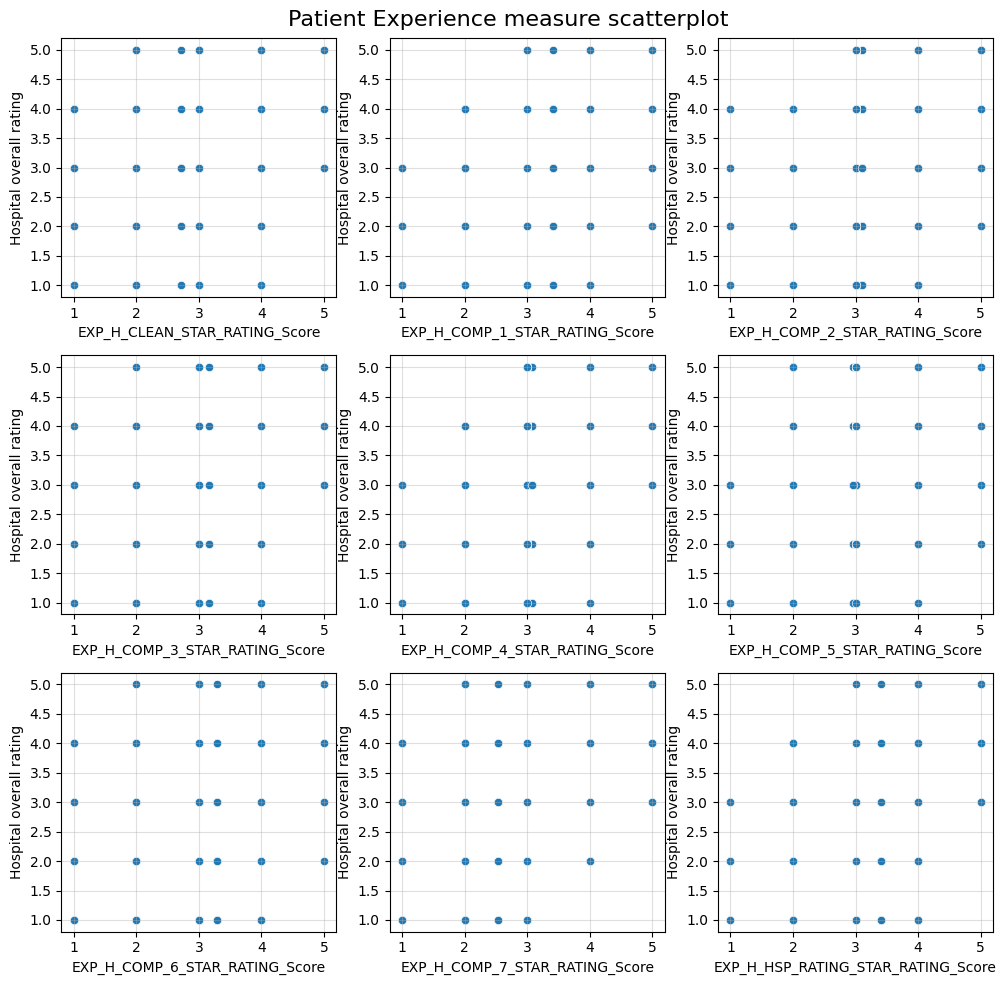

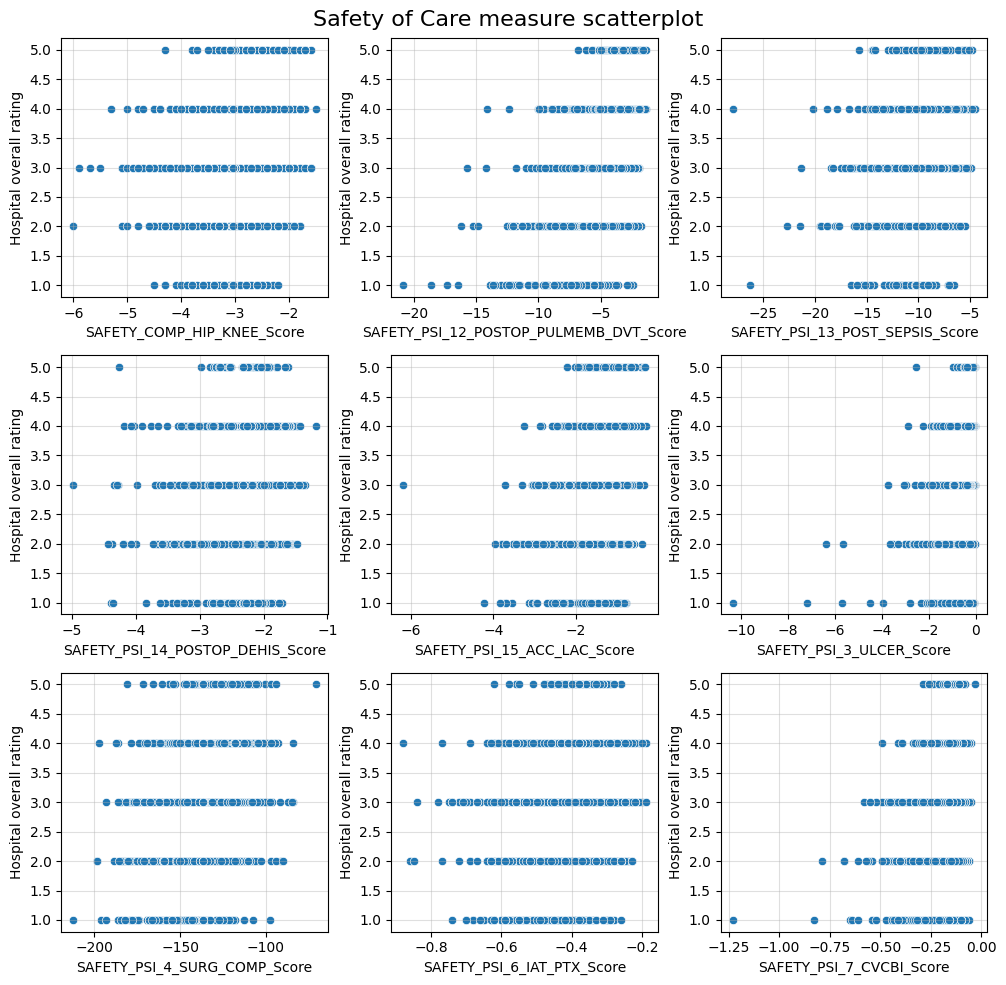

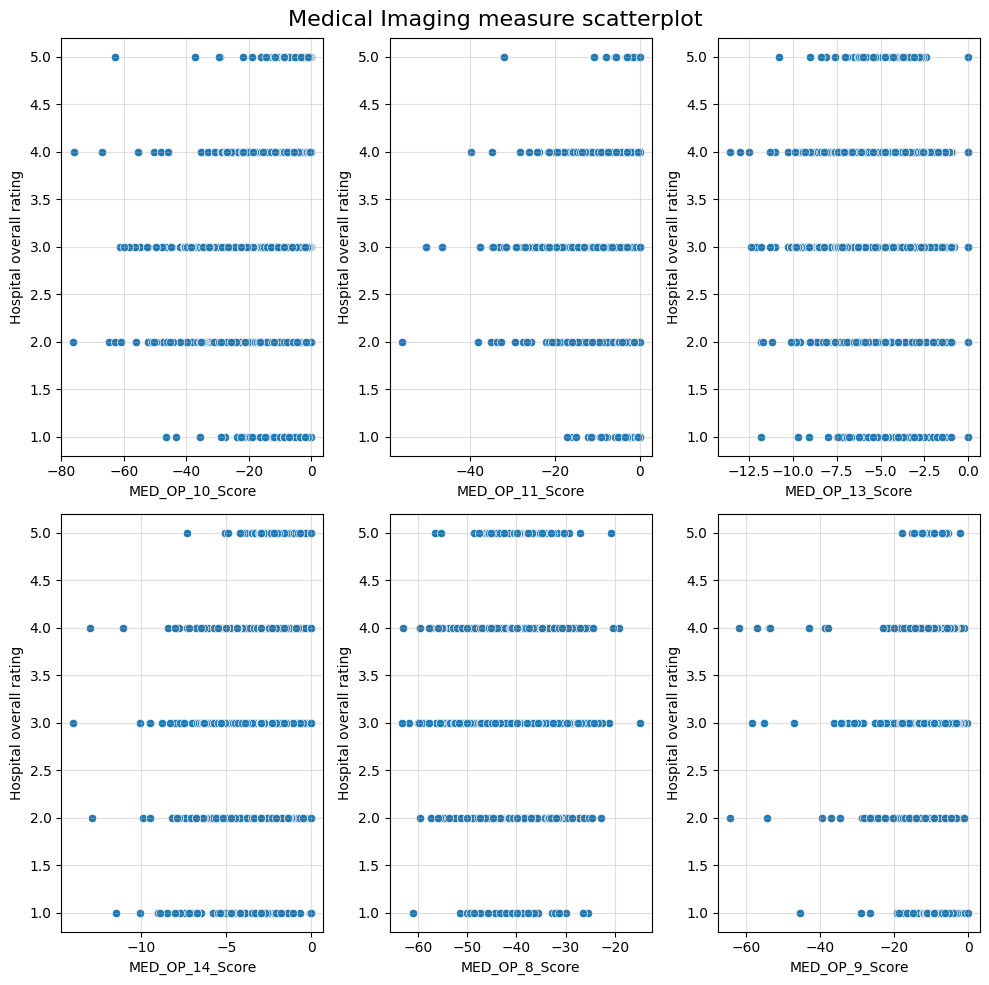

In [25]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

# Iterate over each measure and its columns
for measure, columns in measure_columns.items():
    num_cols = len(columns)
    num_plots = min(num_cols, rows * cols)
    num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

    # Create a new figure for the measure
    fig = plt.figure(figsize=(10, 10))

    # Iterate over each column of the measure
    for i, col in enumerate(columns[:num_plots]):
        # Create subplot
        plt.subplot(num_rows, cols, i + 1)
        
        # Plot histogram
        ax = sns.scatterplot(data=df, x=df[col], y='Hospital overall rating')
        ax.grid(alpha=0.4)
        
        # Set title for each subplot
        fig.suptitle(col)
        
    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.suptitle(f'{measure} measure scatterplot', fontsize=16)
    plt.show()


plt.show()

### Lineplot Between Sub Measures and Hospital overall rating.

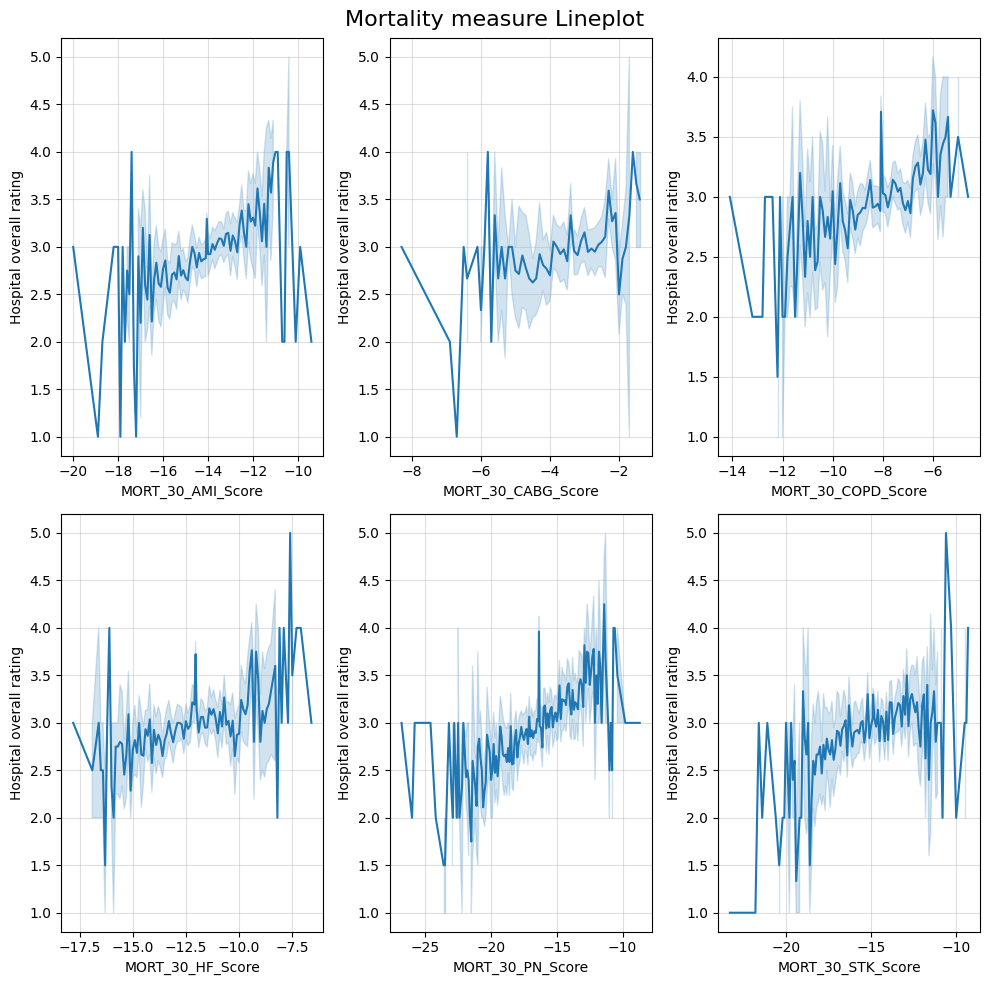

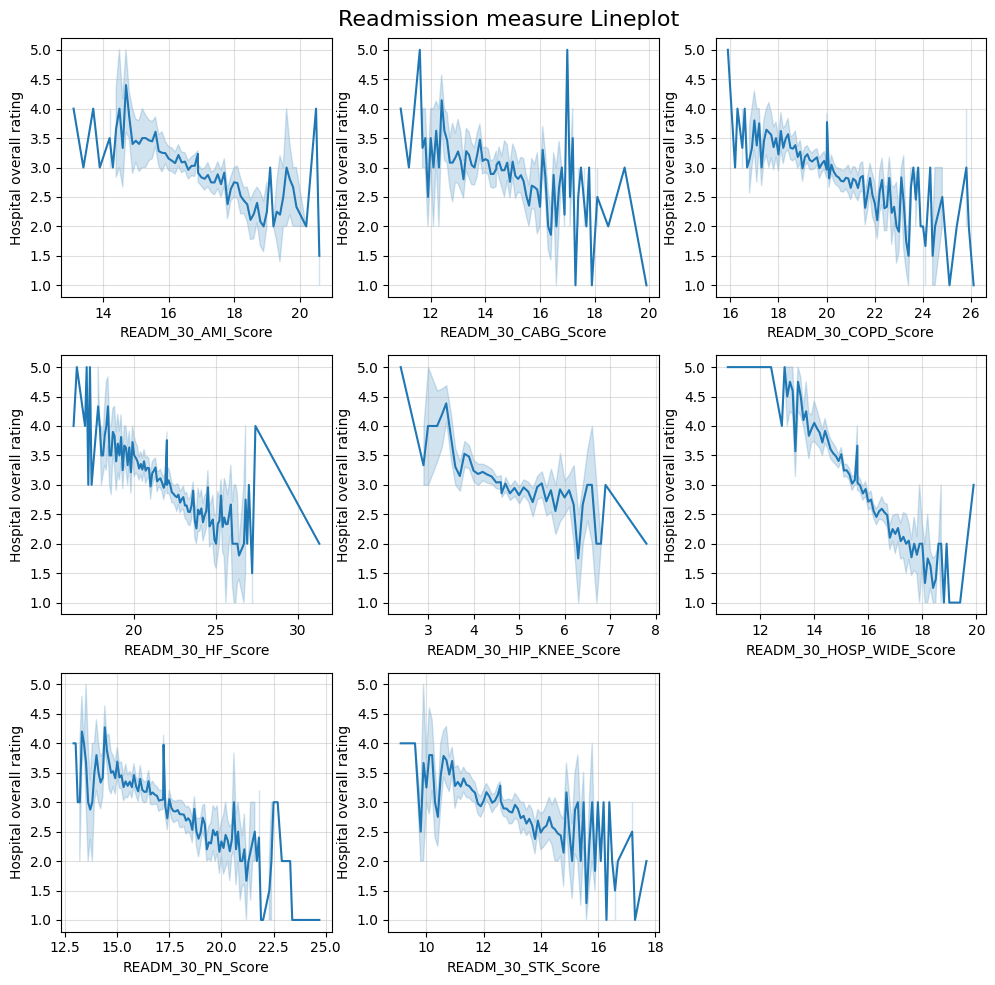

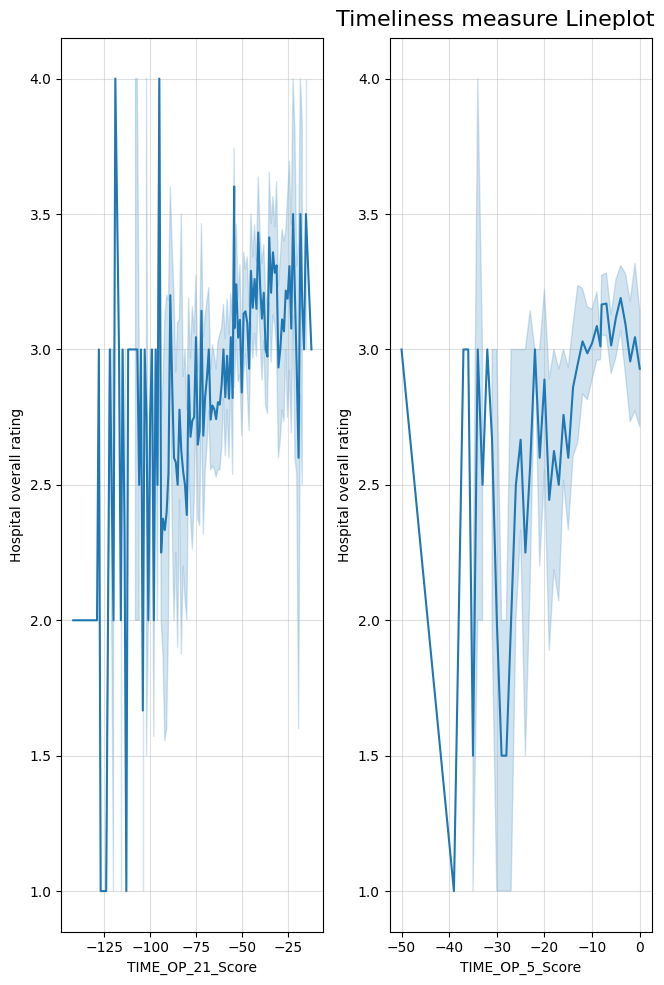

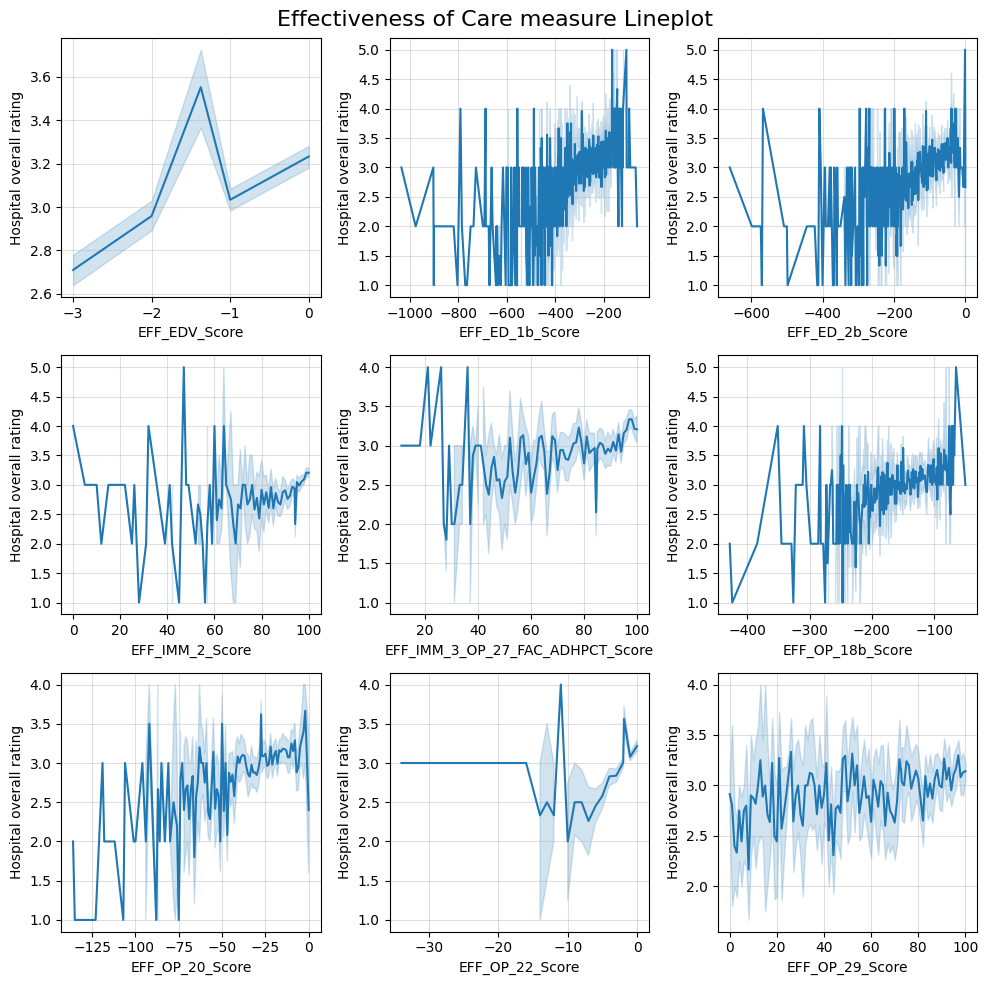

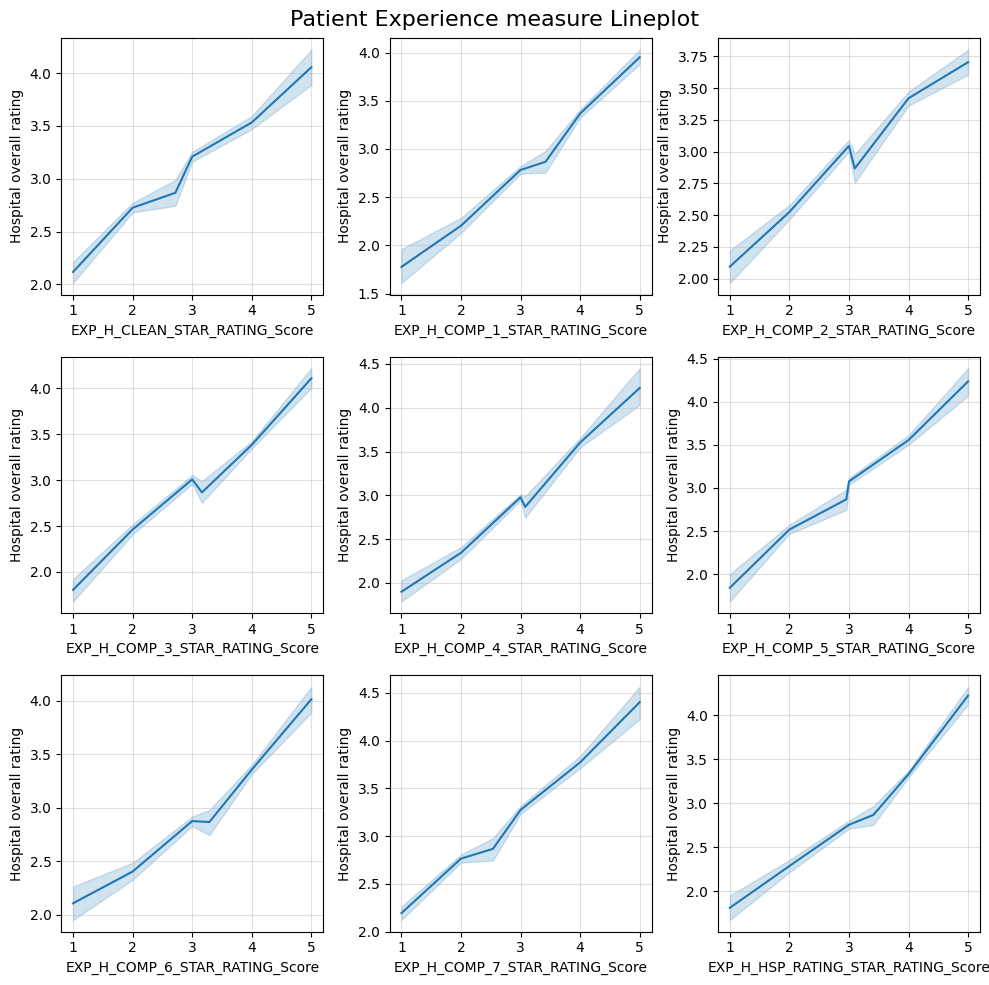

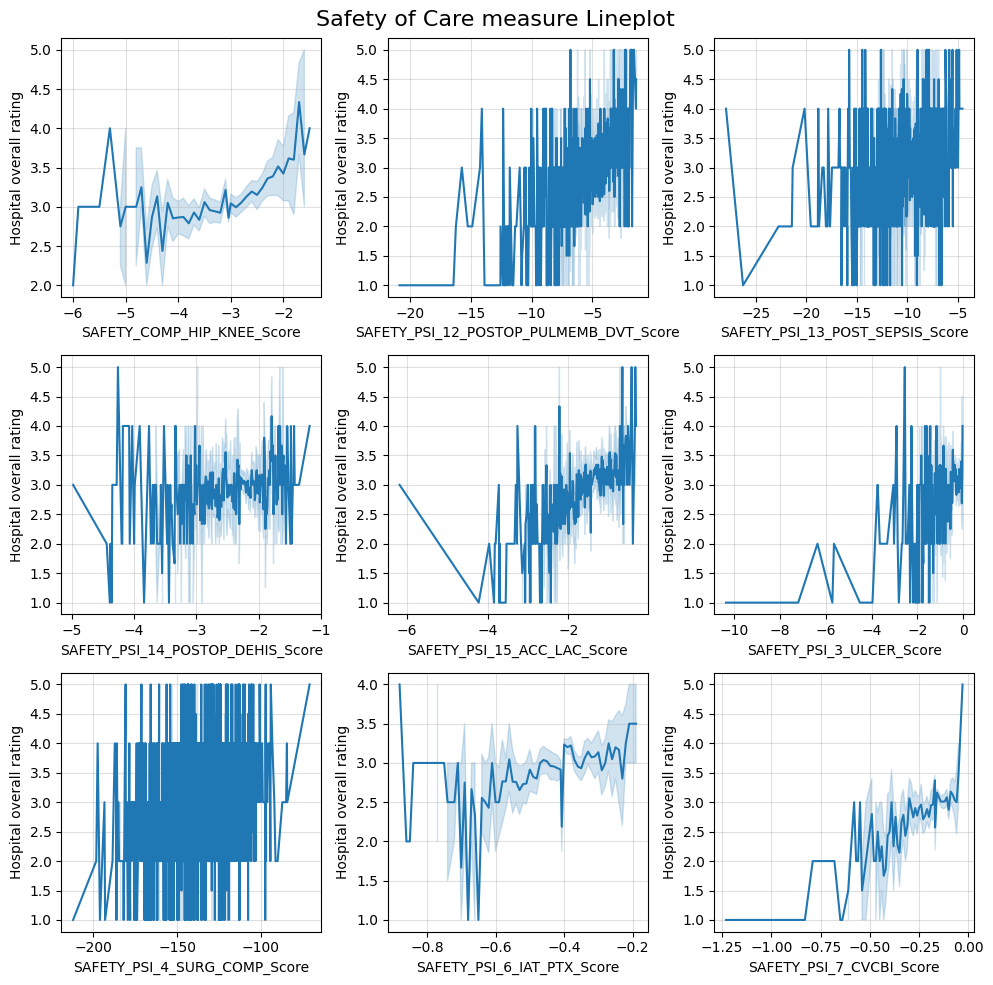

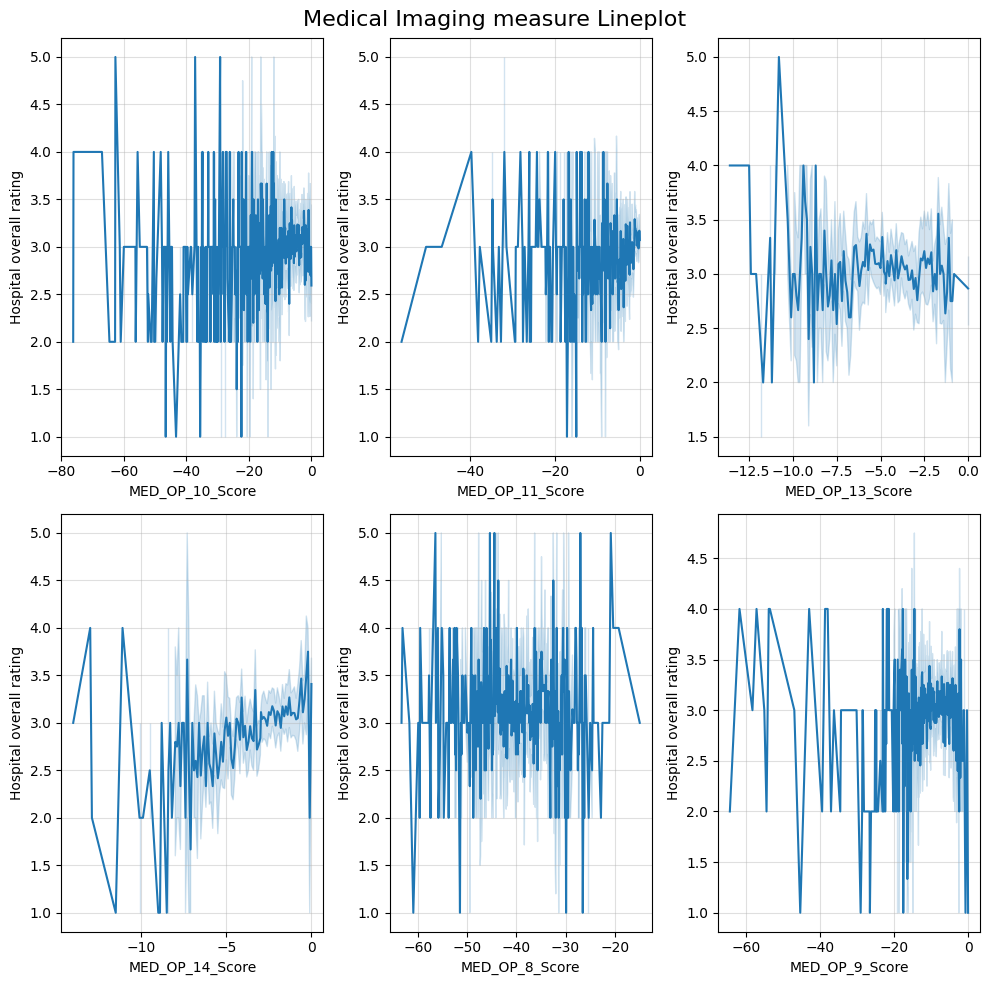

In [26]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

# Iterate over each measure and its columns
for measure, columns in measure_columns.items():
    num_cols = len(columns)
    num_plots = min(num_cols, rows * cols)
    num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

    # Create a new figure for the measure
    fig = plt.figure(figsize=(10, 10))

    # Iterate over each column of the measure
    for i, col in enumerate(columns[:num_plots]):
        # Create subplot
        plt.subplot(num_rows, cols, i + 1)
        
        # Plot histogram
        ax = sns.lineplot(data=df, y='Hospital overall rating', x=df[col])
        ax.grid(alpha=0.4)
        
        # Set title for each subplot
        fig.suptitle(col)
        
    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.suptitle(f'{measure} measure Lineplot', fontsize=16)
    plt.show()

### Lineplot Between Main Measures and Hospital overall rating.

In [27]:
main_features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

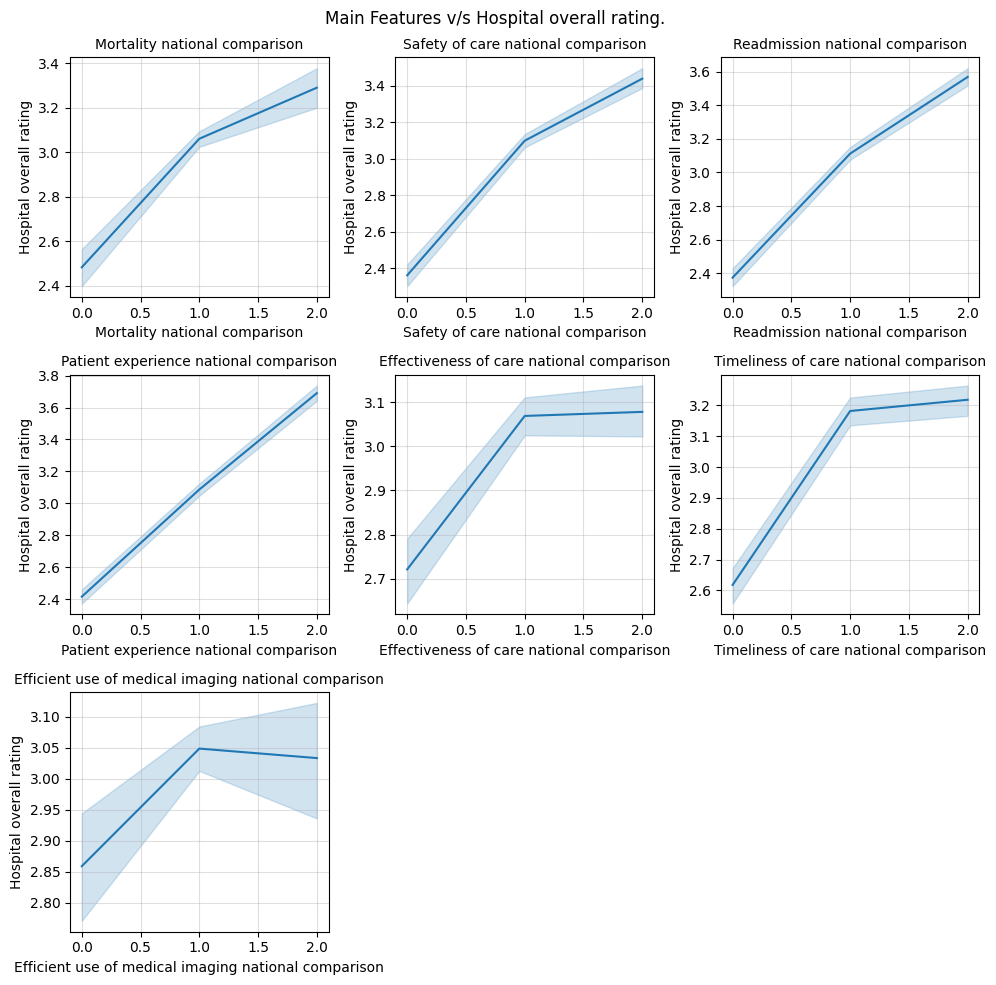

In [28]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

num_cols = len(main_features)
num_plots = min(num_cols, rows * cols)
num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

# Create a new figure for the measure
fig = plt.figure(figsize=(10, 10))

# Iterate over each column of the measure
for i, col in enumerate(main_features[:num_plots]):
    # Create subplot
    plt.subplot(num_rows, cols, i + 1)
    
    # Plot histogram
    ax = sns.lineplot(data=df, y='Hospital overall rating', x=df[col])
    ax.set_title(col, fontsize=10)
    ax.grid(alpha=0.4)
    
# Set title for each subplot
fig.suptitle("Main Features v/s Hospital overall rating.")
    
# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

### HeatMap betweem main measures.

In [29]:
main_features_corr = df.corr(numeric_only=True, method='spearman')['Hospital overall rating'][main_features].sort_values(ascending=False).to_frame()

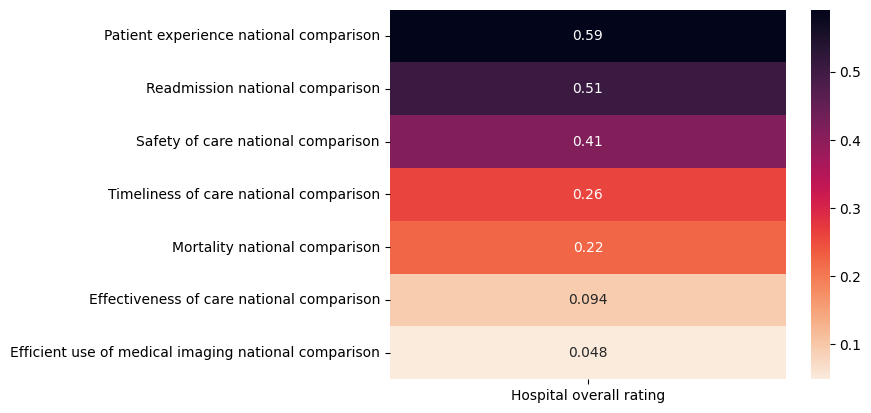

In [30]:
# Set the number of rows and columns for the subplots
# rows = 3
# cols = 3

# num_cols = len(main_features)
# num_plots = min(num_cols, rows * cols)
# num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

# # Create a new figure for the measure
# fig = plt.figure(figsize=(10, 10))

# # Iterate over each column of the measure
# for i, col in enumerate(main_features[:num_plots]):
#     # Create subplot
#     plt.subplot(num_rows, cols, i + 1)
    
#     # Plot histogram
ax = sns.heatmap(main_features_corr, cmap=sns.color_palette("rocket_r", as_cmap=True), annot=True)
#     ax.set_title(f"{col}", fontsize=10)
    
# # Set title for each subplot
# fig.suptitle("Main Features correlation with Hospital overall rating.")
    
# # Adjust layout to prevent overlap of subplots
# plt.tight_layout()
# plt.show()

### By Hospital Ownership and State of the hospital.

In [31]:
state_ownership_pivot_df = df.pivot_table(index="State", columns=["Hospital Ownership"], values=["Hospital overall rating"], aggfunc=["mean"])
state_df = state_ownership_pivot_df['mean']['Hospital overall rating'].reset_index(names="State")

#### Top 10 states by Hospital ownership.

In [32]:
top_state_gov = state_df.sort_values(by=["Government"], ascending=False)[:10][['State','Government']]
top_state_others = state_df.sort_values(by=["Others"], ascending=False)[:10][['State','Others']]
top_state_voluntary = state_df.sort_values(by=["Voluntary"], ascending=False)[:10][['State','Voluntary']]

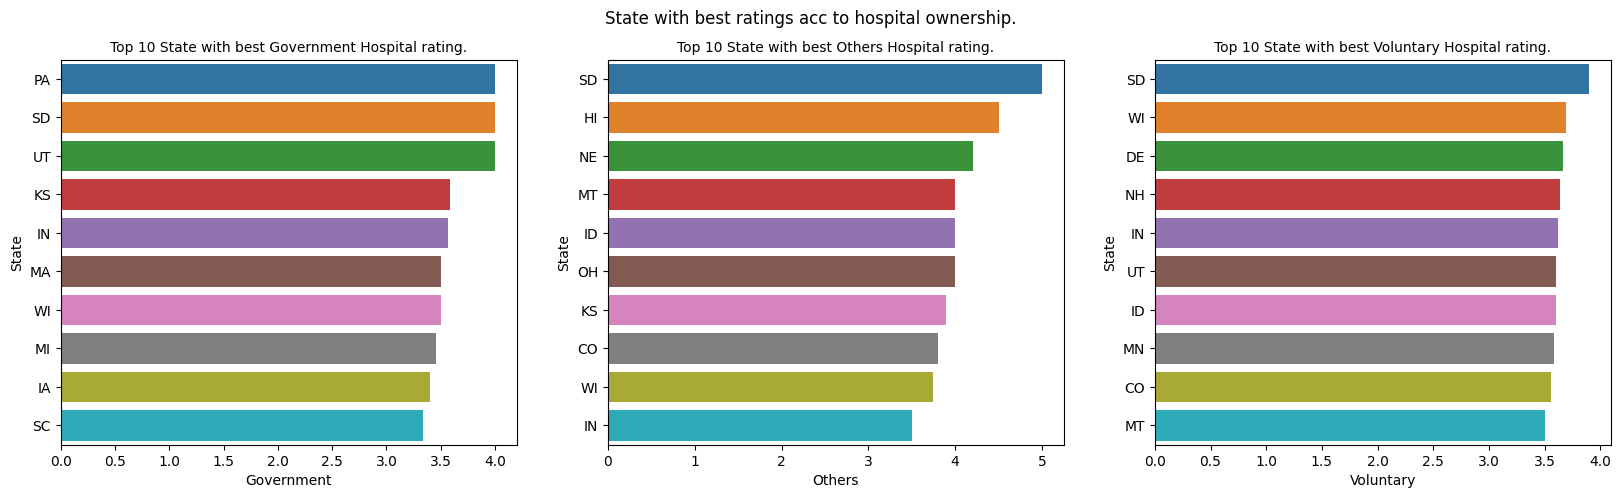

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("State with best ratings acc to hospital ownership.")

gov = sns.barplot(data=top_state_gov, x="Government", y="State", ax=ax[0])
gov.set_title("Top 10 State with best Government Hospital rating.", fontsize=10)


others = sns.barplot(data=top_state_others, x="Others", y="State", ax=ax[1])
others.set_title("Top 10 State with best Others Hospital rating.", fontsize=10)


voluntary = sns.barplot(data=top_state_voluntary, x="Voluntary", y="State", ax=ax[2])
voluntary.set_title("Top 10 State with best Voluntary Hospital rating.", fontsize=10)

plt.show()

### Patient Experience at the hospital owned by different owners.

In [34]:
experience_ownership_pivot_df = df.pivot_table(index="Hospital Ownership",  values=['Patient experience national comparison'], aggfunc=["mean"])

In [35]:
experience_ownership_mean_df = experience_ownership_pivot_df['mean'].reset_index()

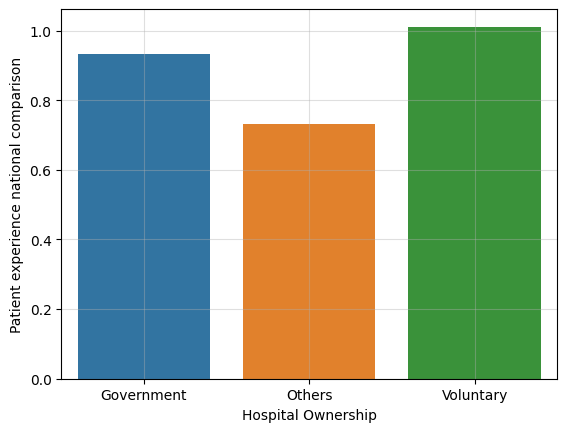

In [36]:
ax = sns.barplot(x=experience_ownership_mean_df['Hospital Ownership'], y=experience_ownership_mean_df['Patient experience national comparison'])
ax.grid(alpha=0.4)

## Building the Machine Learning Models.

### Preparing the data for machine learning model.

#### Dropping all the demographic features.

In [37]:
demographic_features = ['Provider ID','Hospital Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number']

In [38]:
df_model = df.copy()

In [39]:
df_model = df_model.drop(columns=demographic_features)

In [40]:
## Empty means all the features are dropped.
[col for col in demographic_features if col in df_model.columns.to_list()]

[]

#### Dropping the unnecessary columns.

In [41]:
df_model.columns

Index(['Hospital Ownership', 'Emergency Services', 'Hospital overall rating',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison',
       'MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score',
       'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score',
       'rating_group', 'READM_30_AMI_Score', 'READM_30_CABG_Score',
       'READM_30_COPD_Score', 'READM_30_HF_Score', 'READM_30_HIP_KNEE_Score',
       'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score', 'READM_30_STK_Score',
       'TIME_OP_21_Score', 'TIME_OP_5_Score', 'EFF_EDV_Score',
       'EFF_ED_1b_Score', 'EFF_ED_2b_Score', 'EFF_IMM_2_Score',
       'EFF_IMM_3_OP_27_FAC_ADHPCT_Score', 'EFF_OP_18b_Score',
       'EFF_OP_20_Score', 'EFF_OP_2

<Axes: >

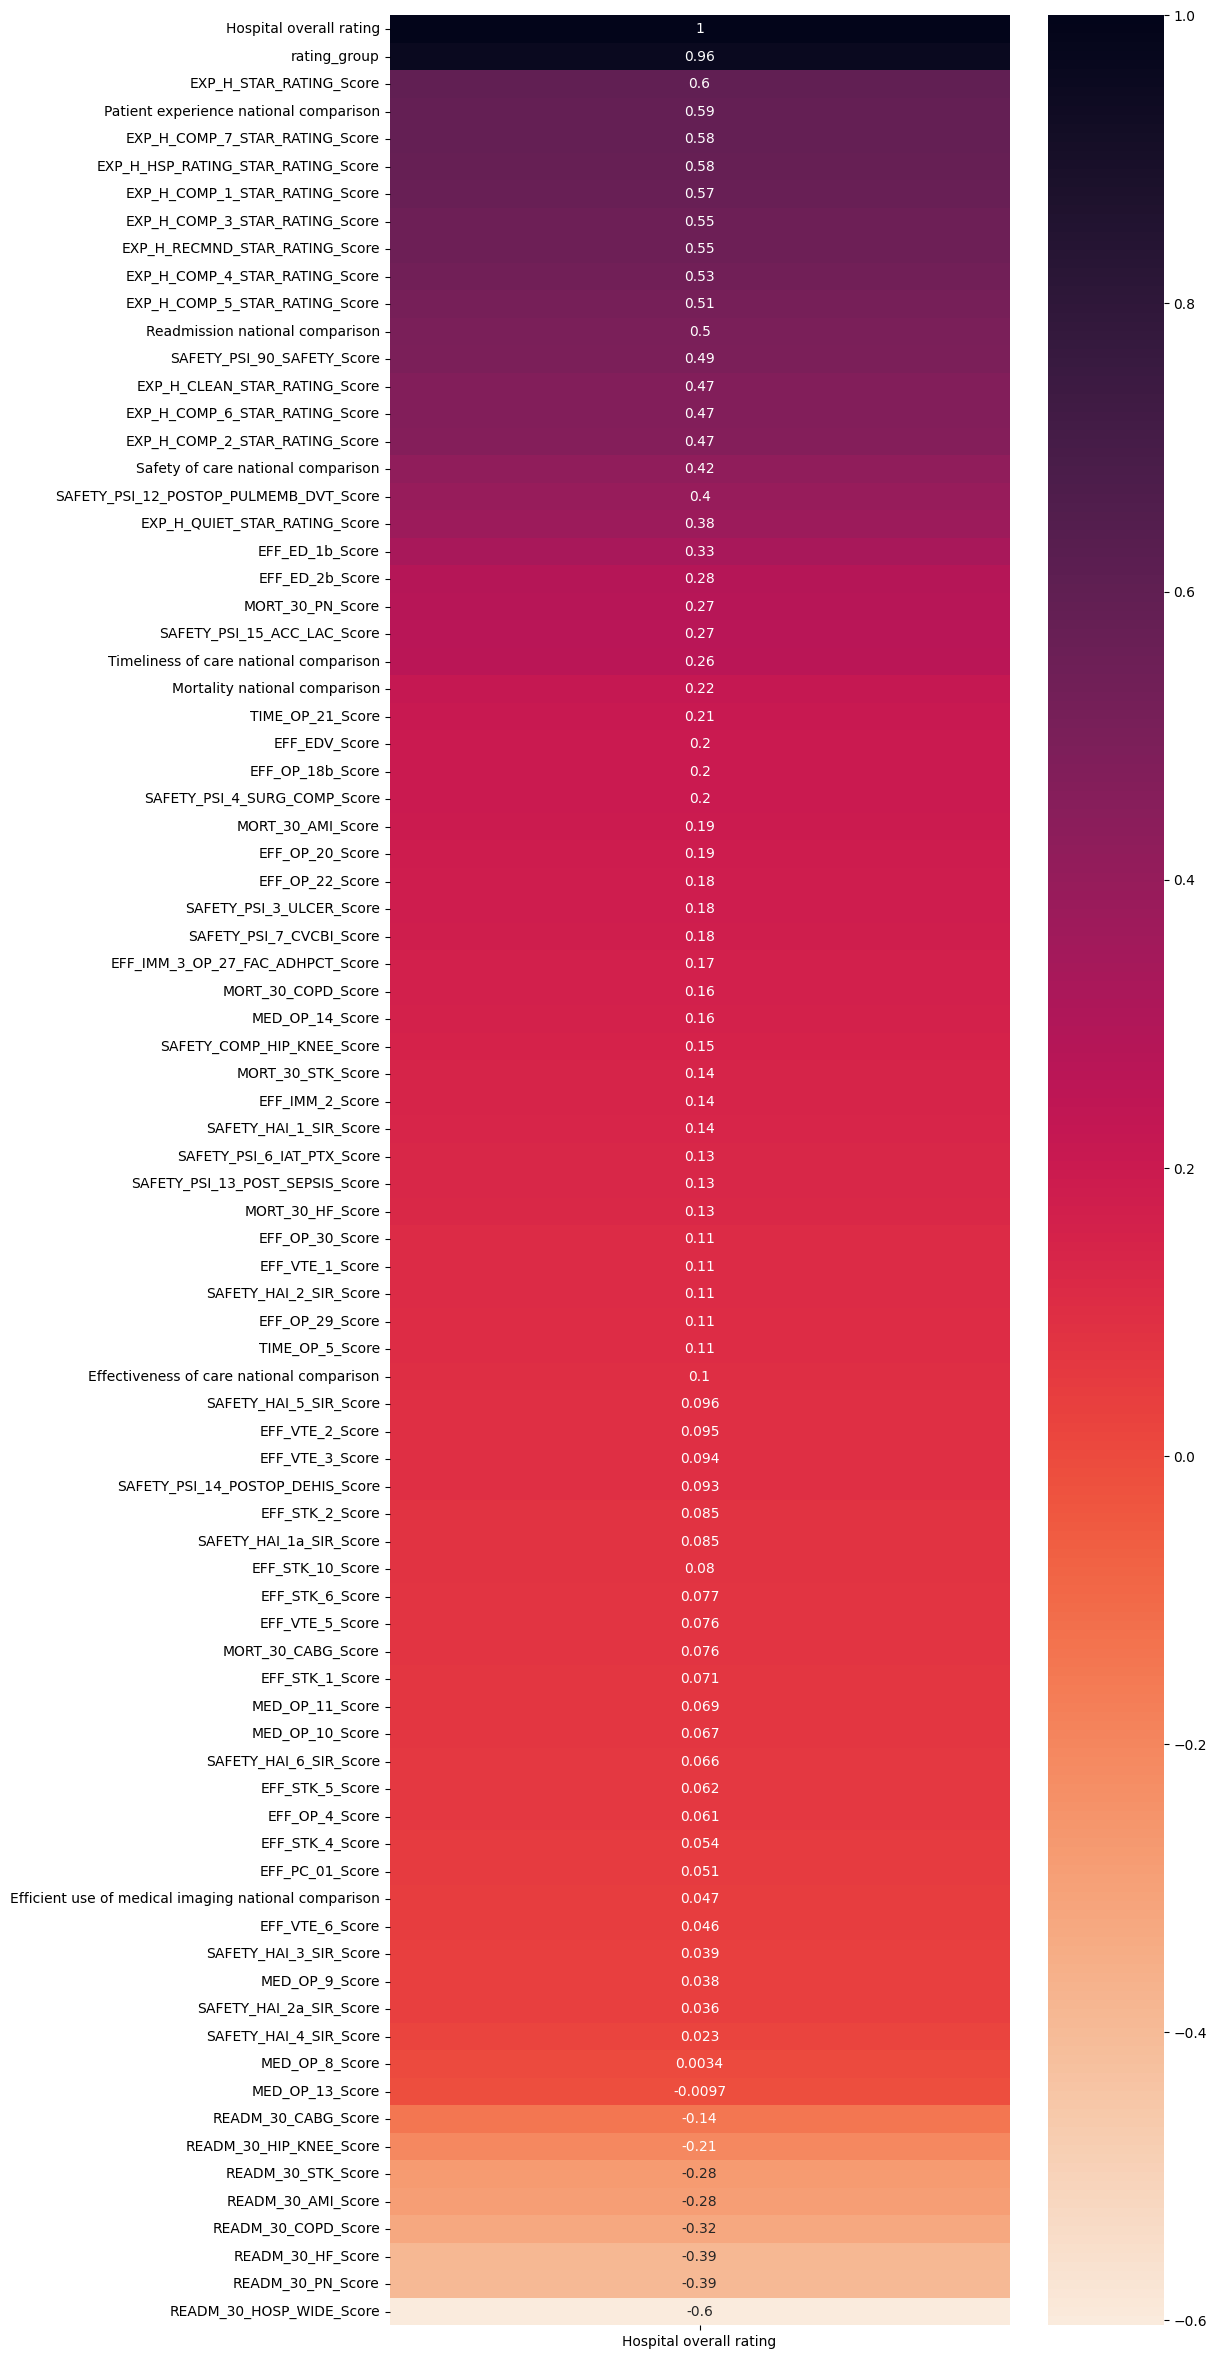

In [42]:
fig, ax = plt.subplots(figsize=(10, 30))
sns.heatmap(df_model.corr(numeric_only=True)['Hospital overall rating'].sort_values(ascending=False).to_frame(), cmap=sns.color_palette("rocket_r", as_cmap=True), annot=True, ax=ax)

In [43]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr(numeric_only=True)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [44]:
corr_features = correlation(df_model, 0.8)

In [45]:
df_model = df_model.drop(corr_features, axis=1)

### Mapping the Ratings.

- 1, 2, and 3 will be 0.
- 4, and 5 will be 1.

In [46]:
def map_ratings(rating: int):
    if rating == 1 or rating == 2 or rating == 3:
        return 0
    else:
        return 1

In [47]:
for i in [1, 2, 1, 3, 2, 5, 4]:
    print(map_ratings(i))

0
0
0
0
0
1
1


In [48]:
df_model['hospital_overall_rating'] = df_model['Hospital overall rating'].apply(lambda x: map_ratings(x))

In [49]:
display_dataframe_as_html(df_model[['hospital_overall_rating', 'Hospital overall rating']])

### Converting datatypes to categorical variables.

In [50]:
nominal_categorical_features = [
    'Hospital Ownership', 'Emergency Services'
]

In [51]:
ordinal_categorical_features = [
    'Mortality national comparison', 'Safety of care national comparison',
    'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison',
    'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison'
]

In [52]:
df_model[nominal_categorical_features] = df_model[nominal_categorical_features].astype('category')

In [53]:
ratings_category = [2, 1, 0]

In [54]:
ratings_category_order = pd.CategoricalDtype(ratings_category, ordered=True)

In [55]:
df_model[ordinal_categorical_features] = df_model[ordinal_categorical_features].astype(ratings_category_order)

In [56]:
display_series_as_html(df_model.dtypes)

### Splitting the Data

In [57]:
X = df_model.drop(columns=['Hospital overall rating', 'hospital_overall_rating'])
y = df_model['hospital_overall_rating']

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

In [59]:
X_train.head()

Hospital Ownership Emergency Services Mortality national comparison  \
2001          Voluntary                Yes                             1   
2336          Voluntary                Yes                             1   
1242          Voluntary                Yes                             1   
1491          Voluntary                Yes                             1   
1651          Voluntary                Yes                             1   

     Safety of care national comparison Readmission national comparison  \
2001                                  2                               2   
2336                                  0                               0   
1242                                  1                               1   
1491                                  1                               1   
1651                                  1                               1   

     Patient experience national comparison  \
2001                                      1   
2336                                      1   
1242                                      0   
1491                                      1   
1651                                      2   

     Effectiveness of care national comparison  \
2001                                         1   
2336                                         2   
1242                                         1   
1491                                         1   
1651                                         1   

     Timeliness of care national comparison  \
2001                                      2   
2336                                      0   
1242                                      1   
1491                                      2   
1651                                      1   

     Efficient use of medical imaging national comparison  MORT_30_AMI_Score  \
2001                                                  1           -14.500000   
2336                                                  1           -13.100000   
1242                                                  1           -14.400000   
1491                                                  1           -14.054091   
1651                                                  1           -15.900000   

      ...  SAFETY_HAI_3_SIR_Score  SAFETY_HAI_4_SIR_Score  \
2001  ...                -0.96398               -0.871177   
2336  ...                -0.73900               -0.000000   
1242  ...                -0.98400               -0.871177   
1491  ...                -0.96398               -1.528000   
1651  ...                -1.28600               -0.871177   

      SAFETY_HAI_5_SIR_Score  SAFETY_HAI_6_SIR_Score  MED_OP_10_Score  \
2001               -0.987212                  -0.000            -13.0   
2336               -0.497000                  -0.625             -9.5   
1242               -2.126000                  -1.632            -13.3   
1491               -0.987212                  -0.865             -6.8   
1651               -0.987212                  -1.188             -2.6   

      MED_OP_11_Score  MED_OP_13_Score  MED_OP_14_Score  MED_OP_8_Score  \
2001             -4.1        -4.716942        -2.964405      -39.964766   
2336             -0.0        -4.500000        -1.300000      -25.000000   
1242             -0.0        -3.500000        -1.300000      -39.964766   
1491            -11.8        -4.716942        -2.964405      -39.964766   
1651             -0.0        -4.300000        -1.800000      -35.400000   

      MED_OP_9_Score  
2001       -4.400000  
2336       -7.800000  
1242       -8.400000  
1491       -2.300000  
1651       -9.144957  

[5 rows x 79 columns]

### Encoding and Scaling the data.

In [60]:
nominal_categorical_features_idx = [X_train.columns.get_loc(x) for x in nominal_categorical_features]

In [61]:
ordinal_categorical_features_idx = [X_train.columns.get_loc(x) for x in ordinal_categorical_features]

In [62]:
numerical_features_idx = [X_train.columns.get_loc(x) for x in X_train.select_dtypes('float64').columns]

In [63]:
ordinal_transformer = ColumnTransformer(transformers=[
    ('ord_en', OrdinalEncoder(), nominal_categorical_features_idx),
], remainder='passthrough')

In [71]:
ohe_transformer = ColumnTransformer(transformers=[
    ('ohe_en', OneHotEncoder(drop='first', sparse_output=False), ordinal_categorical_features_idx),
], remainder='passthrough')

In [72]:
scaler_transformer = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), slice(0, 80))
], remainder='passthrough')

### Creating the Logistic Regression Pipeline

In [73]:
log_reg = LogisticRegression(penalty=None, solver='lbfgs', random_state=0, 
                                     max_iter=10000)

In [74]:
logistic_regression_pipeline = Pipeline(steps=[
    ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('std_scale_trf', scaler_transformer),
    ('log_reg', log_reg)
])

In [75]:
logistic_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ord_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_en', OrdinalEncoder(),
                                                  [0, 1])])),
                ('nom_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_en',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('std_scale_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 80, None))])),
                ('log_reg',
                 LogisticRegression(max_iter=10000, penalty=None,
                                    random_state=0))])

In [76]:
log_train_acc = logistic_regression_pipeline.score(X_train, y_train)
log_val_acc = logistic_regression_pipeline.score(X_val, y_val)

In [77]:
(log_train_acc, log_val_acc)

(0.9565217391304348, 0.9357298474945533)

### Creating DecisionTreeClassifier Pipeline

In [110]:
decision_tree_clf = DecisionTreeClassifier(random_state=13)

In [111]:
decision_tree_pipeline = Pipeline(steps=[
    ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('tree_clf', decision_tree_clf)
])

In [112]:
decision_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ord_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_en', OrdinalEncoder(),
                                                  [0, 1])])),
                ('nom_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_en',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('tree_clf', DecisionTreeClassifier(random_state=13))])

In [113]:
tree_clf_train_acc = decision_tree_pipeline.score(X_train, y_train)
tree_clf_val_acc = decision_tree_pipeline.score(X_val, y_val)

In [115]:
(tree_clf_train_acc, tree_clf_val_acc)

(1.0, 0.8257080610021786)

Large gap between the training accuracy score and validation accuracy score signifies that Model is overfitting the data.\
We can mitigate the overfitting of data by pruning the decision tree.

### Pruning The decision Tree

In [116]:
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

In [117]:
clf = DecisionTreeClassifier(random_state=13)

In [124]:
grid_search_pipeline = Pipeline(steps=[
    ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('grid_search', grid_cv_for_clf)
])

In [129]:
best_params_clf = grid_search_pipeline['grid_search'].best_params_

In [131]:
best_params_clf

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [128]:
grid_search_pipeline['grid_search'].best_score_

0.8479387452388911

In [132]:
pruned_decision_tree = DecisionTreeClassifier(max_depth=best_params_clf['max_depth'], min_samples_leaf=best_params_clf['min_samples_leaf'], min_samples_split=best_params_clf['min_samples_split'], random_state=13)

In [133]:
pruned_tree_clf_pipeline = Pipeline(steps=[
    ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('tree_clf', pruned_decision_tree)
])

In [134]:
pruned_tree_clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ord_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_en', OrdinalEncoder(),
                                                  [0, 1])])),
                ('nom_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_en',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('tree_clf',
                 DecisionTreeClassifier(max_depth=3, random_state=13))])

In [135]:
pruned_tree_clf_train_acc = pruned_tree_clf_pipeline.score(X_train, y_train)
pruned_tree_clf_val_acc = pruned_tree_clf_pipeline.score(X_val, y_val)

In [136]:
(pruned_tree_clf_train_acc, pruned_tree_clf_val_acc)

(0.841982234689107, 0.8082788671023965)

the pruned decision tree model demonstrates reasonable performance on both the test and validation datasets, indicating that the pruning process has helped mitigate overfitting and improve the model's generalization ability

## K-Nearest Neighbours Model

In [137]:
knn = KNeighborsClassifier(n_neighbors=3)

In [138]:
knn_pipeline = Pipeline(steps=[
    ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('std_scale_trf', scaler_transformer),
    ('knn_clf', knn)
])

In [139]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ord_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_en', OrdinalEncoder(),
                                                  [0, 1])])),
                ('nom_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_en',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('std_scale_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 80, None))])),
                ('knn_clf', KNeighborsClassifier(n_neighbors=3))])

In [140]:
knn_clf_train_acc = knn_pipeline.score(X_train, y_train)
knn_clf_val_acc = knn_pipeline.score(X_val, y_val)

In [141]:
(knn_clf_train_acc, knn_clf_val_acc)

(0.8938756428237494, 0.7864923747276689)

There is overfitting in the model as the difference is large.

### Optimizing the model

In [143]:
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
}

In [144]:
knn_clf = KNeighborsClassifier(algorithm='auto')

In [145]:
grid_cv_for_knn = GridSearchCV(
    estimator=knn_clf,
    param_grid=parameters_KNN,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)

In [146]:
grid_search_knn_pipeline = Pipeline(steps=[
    ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('grid_search_knn', grid_cv_for_knn)
])

In [147]:
grid_search_knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ord_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_en', OrdinalEncoder(),
                                                  [0, 1])])),
                ('nom_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_en',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('grid_search_knn',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                              param_grid={'leaf_size': (20, 40, 1),
                                          'metric': ('minkowski', 'chebyshev'),
                                          'n_neighbors': (1, 10, 1),
                                          'p': (1, 2),
                                          'weights': ('uniform', 'distance')},
                              scoring='accuracy'))])

In [149]:
best_params_knn = grid_search_knn_pipeline['grid_search_knn'].best_params_

In [150]:
best_params_knn

{'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 10,
 'p': 1,
 'weights': 'uniform'}

In [154]:
best_knn_clf = KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski', n_neighbors=10, p=1, weights='uniform')

In [155]:
best_knn_pipeline = Pipeline(steps=[
    ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('std_scale_trf', scaler_transformer),
    ('knn_clf', best_knn_clf)
])

In [157]:
best_knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ord_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_en', OrdinalEncoder(),
                                                  [0, 1])])),
                ('nom_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_en',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('std_scale_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 80, None))])),
                ('knn_clf',
                 KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1))])

In [158]:
best_knn_clf_train_acc = best_knn_pipeline.score(X_train, y_train)
best_knn_clf_val_acc = best_knn_pipeline.score(X_val, y_val)

In [159]:
(best_knn_clf_train_acc, best_knn_clf_val_acc)

(0.8821879382889201, 0.8464052287581699)

## Metrics of the Models.

In [160]:
models = [
    logistic_regression_pipeline,
    pruned_tree_clf_pipeline,
    best_knn_pipeline,
]